# kymatio이용한 Scattering 
1. RGB image - scattering with J=1, J=2
2.            -scattering 2번
3. gray scale 로 바꾸고  scattering 

## 0. import & image load

In [20]:
import torch
import sys
# from kymatio.torch import Scattering2D
sys.path.append("/root/jieunoh/ellen_code/kymatio_ellen") #fiqa -miv2 
import kymatio_ellen
import kymatio_ellen.torch
from kymatio_ellen.torch import Scattering2D

In [15]:
sys.path.append("/root/jieunoh/ellen_code/kymatio_ellen") #fiqa -miv2 
import kymatio_ellen
from kymatio_ellen.torch import Scattering2D

In [7]:
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as img
from torchvision.transforms.functional import rgb_to_grayscale

1. image import & resize

In [8]:
pimg = Image.open("/root/jieunoh/ellen_data/1_ukb_cyclegan_input/ukb_512_1/testA/0000.jpg")
pimg_gray = pimg.convert("L") # to gray scale
print(pimg.size)
print(type(pimg))
pimg=pimg.resize((512,512), Image.ANTIALIAS)
pimg_gray=pimg_gray.resize((512,512), Image.ANTIALIAS)
print(pimg.size)

(512, 512)
<class 'PIL.JpegImagePlugin.JpegImageFile'>
(512, 512)


예시 이미지


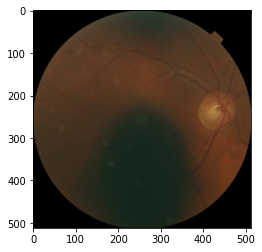

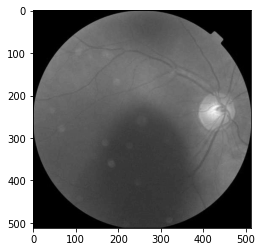

In [9]:
print("예시 이미지")
plt.imshow(pimg)
plt.show()
plt.imshow(pimg_gray,cmap='gray')
plt.show()

## 2. Scattering을 적용하기 위해서 tensor로 바꾸기

In [10]:
from torchvision.transforms import ToTensor,ToPILImage
totensor = ToTensor()
topilimage=ToPILImage()

In [11]:
timg= totensor(pimg) # torch tensor로 바뀜
# timg=timg.cuda() # 이 셀 실행만 느려지고, 뒤에 걸리는 시간은 비슷함
timg=timg
timg_gray = totensor(pimg_gray)
print(timg.shape) 
print(timg_gray.shape) 

print('>rgb tensor min/max :',timg.min(), timg.max() )
print('>gray tensor min/max :',timg_gray.min(), timg_gray.max() )
print('>rgb img min/max :',pimg.getextrema() )
print('>gray img min/max :',pimg_gray.getextrema() )


torch.Size([3, 512, 512])
torch.Size([1, 512, 512])
>rgb tensor min/max : tensor(0.) tensor(0.7373)
>gray tensor min/max : tensor(0.) tensor(0.5765)
>rgb img min/max : ((0, 188), (0, 139), (0, 91))
>gray img min/max : (0, 147)


----------------------------------여기까지는 다른 거 돌릴 때도 필수 ------------------------------------

## 2-1. Scattering2D 적용 (확인용 list로) J=2, J =3, J=1
-out_type를 array말고! full 정보로!

### J=2

In [7]:
#Scattering2D() - 세팅
J=2
M,N = 512,512
s2= Scattering2D(J,(M,N),out_type = "list")

soutput2 = s2.scattering(timg) # scattering
print(len(soutput2))
print(soutput2)

x torch.Size([3, 512, 512])
U_r torch.Size([3, 520, 520, 1])
U_0_c torch.Size([3, 520, 520, 2])
U_1_c-cdgmm torch.Size([3, 520, 520, 2])
U_1_c-subsampelf torch.Size([3, 130, 130, 2])
S_0 torch.Size([3, 130, 130, 1])
S_0 torch.Size([3, 128, 128])
--------1----------
U_0_c-start torch.Size([3, 520, 520, 2])
U_1_c-cdgmm torch.Size([3, 520, 520, 2])
U_1_c-ifft torch.Size([3, 520, 520, 2])
U_1_c-modulus torch.Size([3, 520, 520, 1])
U_1_c-rfft torch.Size([3, 520, 520, 2])
S_1_c-cdgmm torch.Size([3, 520, 520, 2])
S_1_c-subsample torch.Size([3, 130, 130, 2])
S_1_r-irfft torch.Size([3, 130, 130, 1])
S_1_r-unpad torch.Size([3, 128, 128])
-----------2-----------
U_1_c-start torch.Size([3, 520, 520, 2])
U_2_c-cdgmm torch.Size([3, 520, 520, 2])
U_2_c-subsample torch.Size([3, 260, 260, 2])
U_2_c-ifft torch.Size([3, 260, 260, 2])
U_2_c-modulus torch.Size([3, 260, 260, 1])
U_2_c-rfft torch.Size([3, 260, 260, 2])
S_2_c-cdgmm torch.Size([3, 260, 260, 2])
S_2_c-subsample torch.Size([3, 130, 130, 2])
S_2_

In [10]:
# 각key의 값을 보고 어떻게 더 layer를 더 쌓을지 생각
keyy = ["j", "n","theta"]
for i in range(len(soutput2)):
  print("[",i,"]", end = "  ")
  print(soutput2[i]["coef"].shape, end = ", ") #"coef:""
  for k in keyy:
    print(k,": ", soutput2[i][k], end=", ")
  print()

[ 0 ]  torch.Size([3, 128, 128]), j :  (), n :  (), theta :  (), 
[ 1 ]  torch.Size([3, 128, 128]), j :  (0,), n :  (0,), theta :  (0,), 
[ 2 ]  torch.Size([3, 128, 128]), j :  (0,), n :  (1,), theta :  (1,), 
[ 3 ]  torch.Size([3, 128, 128]), j :  (0,), n :  (2,), theta :  (2,), 
[ 4 ]  torch.Size([3, 128, 128]), j :  (0,), n :  (3,), theta :  (3,), 
[ 5 ]  torch.Size([3, 128, 128]), j :  (0,), n :  (4,), theta :  (4,), 
[ 6 ]  torch.Size([3, 128, 128]), j :  (0,), n :  (5,), theta :  (5,), 
[ 7 ]  torch.Size([3, 128, 128]), j :  (0,), n :  (6,), theta :  (6,), 
[ 8 ]  torch.Size([3, 128, 128]), j :  (0,), n :  (7,), theta :  (7,), 
[ 9 ]  torch.Size([3, 128, 128]), j :  (1,), n :  (8,), theta :  (0,), 
[ 10 ]  torch.Size([3, 128, 128]), j :  (1,), n :  (9,), theta :  (1,), 
[ 11 ]  torch.Size([3, 128, 128]), j :  (1,), n :  (10,), theta :  (2,), 
[ 12 ]  torch.Size([3, 128, 128]), j :  (1,), n :  (11,), theta :  (3,), 
[ 13 ]  torch.Size([3, 128, 128]), j :  (1,), n :  (12,), theta :

### J=3

In [11]:
#Scattering2D() - 세팅
J=3
M,N = 512,512
s3= Scattering2D(J,(M,N),out_type = "list")

soutput3 = s3.scattering(timg) # scattering
print(len(soutput3))

217


In [12]:
# 각key의 값을 보고 어떻게 더 layer를 더 쌓을지 생각
keyy = ["j", "n","theta"]
for i in range(len(soutput3)):
  print("[",i,"]", end = "  ")
  print(soutput3[i]["coef"].shape, end = ", ") #"coef:""
  for k in keyy:
    print(k,": ", soutput3[i][k], end=", ")
    
  print()

[ 0 ]  torch.Size([3, 64, 64]), j :  (), n :  (), theta :  (), 
[ 1 ]  torch.Size([3, 64, 64]), j :  (0,), n :  (0,), theta :  (0,), 
[ 2 ]  torch.Size([3, 64, 64]), j :  (0,), n :  (1,), theta :  (1,), 
[ 3 ]  torch.Size([3, 64, 64]), j :  (0,), n :  (2,), theta :  (2,), 
[ 4 ]  torch.Size([3, 64, 64]), j :  (0,), n :  (3,), theta :  (3,), 
[ 5 ]  torch.Size([3, 64, 64]), j :  (0,), n :  (4,), theta :  (4,), 
[ 6 ]  torch.Size([3, 64, 64]), j :  (0,), n :  (5,), theta :  (5,), 
[ 7 ]  torch.Size([3, 64, 64]), j :  (0,), n :  (6,), theta :  (6,), 
[ 8 ]  torch.Size([3, 64, 64]), j :  (0,), n :  (7,), theta :  (7,), 
[ 9 ]  torch.Size([3, 64, 64]), j :  (1,), n :  (8,), theta :  (0,), 
[ 10 ]  torch.Size([3, 64, 64]), j :  (1,), n :  (9,), theta :  (1,), 
[ 11 ]  torch.Size([3, 64, 64]), j :  (1,), n :  (10,), theta :  (2,), 
[ 12 ]  torch.Size([3, 64, 64]), j :  (1,), n :  (11,), theta :  (3,), 
[ 13 ]  torch.Size([3, 64, 64]), j :  (1,), n :  (12,), theta :  (4,), 
[ 14 ]  torch.Size(

### J=1

In [8]:
#Scattering2D() - 세팅
J=1
M,N = 512,512
s1= Scattering2D(J,(M,N),out_type = "list")

soutput1 = s1.scattering(timg) # scattering
print(len(soutput1))
print(soutput1)

x torch.Size([3, 512, 512])
U_r torch.Size([3, 516, 516, 1])
U_0_c torch.Size([3, 516, 516, 2])
U_1_c-cdgmm torch.Size([3, 516, 516, 2])
U_1_c-subsampelf torch.Size([3, 258, 258, 2])
S_0 torch.Size([3, 258, 258, 1])
S_0 torch.Size([3, 256, 256])
9
[{'coef': tensor([[[ 6.3330e-08,  1.8626e-08, -5.2154e-08,  ...,  1.4901e-08,
           1.1176e-08, -2.2352e-08],
         [ 5.9605e-08, -3.7253e-09, -3.3528e-08,  ...,  1.1921e-07,
          -7.4506e-09, -3.7253e-08],
         [ 7.8231e-08, -1.8626e-08, -1.8626e-08,  ...,  5.9605e-08,
           1.4901e-08,  7.4506e-09],
         ...,
         [ 4.7364e-08, -2.5876e-08, -4.9128e-08,  ...,  8.8228e-08,
          -2.3551e-08, -2.7641e-08],
         [ 6.6721e-08, -1.6332e-08, -1.7731e-08,  ...,  5.5049e-08,
          -3.6943e-09,  5.3013e-10],
         [ 7.7897e-08,  1.8791e-08, -1.0080e-08,  ...,  1.3851e-07,
           9.6236e-10, -7.2404e-09]],

        [[-2.9802e-08,  9.6858e-08, -1.8626e-08,  ...,  3.7253e-08,
          -4.8429e-08,  1.26

In [ ]:
# 각key의 값을 보고 어떻게 더 layer를 더 쌓을지 생각
keyy = ["j", "n","theta"]
for i in range(len(soutput1)):
  print("[",i,"]", end = "  ")
  print(soutput1[i]["coef"].shape, end = ", ") #"coef:""
  for k in keyy:
    print(k,": ", soutput1[i][k], end=", ")
    
  print()

In [19]:
#Scattering2D() - 세팅
J=1
M,N = 512,512
s1= Scattering2D(J,(M,N),out_type = "list")

soutput1 = s1.scattering(timg) # scattering

In [20]:
soutput1

[{'coef': tensor([[[ 6.3330e-08,  1.8626e-08, -5.2154e-08,  ...,  1.4901e-08,
             1.1176e-08, -2.2352e-08],
           [ 5.9605e-08, -3.7253e-09, -3.3528e-08,  ...,  1.1921e-07,
            -7.4506e-09, -3.7253e-08],
           [ 7.8231e-08, -1.8626e-08, -1.8626e-08,  ...,  5.9605e-08,
             1.4901e-08,  7.4506e-09],
           ...,
           [ 4.7364e-08, -2.5876e-08, -4.9128e-08,  ...,  8.8228e-08,
            -2.3551e-08, -2.7641e-08],
           [ 6.6721e-08, -1.6332e-08, -1.7731e-08,  ...,  5.5049e-08,
            -3.6943e-09,  5.3013e-10],
           [ 7.7897e-08,  1.8791e-08, -1.0080e-08,  ...,  1.3851e-07,
             9.6236e-10, -7.2404e-09]],
  
          [[-2.9802e-08,  9.6858e-08, -1.8626e-08,  ...,  3.7253e-08,
            -4.8429e-08,  1.2666e-07],
           [-3.3528e-08,  9.6858e-08, -5.2154e-08,  ...,  2.2352e-08,
            -4.0978e-08,  1.2293e-07],
           [-7.0781e-08,  6.7055e-08, -6.7055e-08,  ..., -2.2352e-08,
            -7.8231e-08,  8.56

In [1]:
import torch
from kymatio.torch import Scattering2D

/home/guest1/.conda/envs/ellen/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 2-2. J=2일때, subsample fouier의 k값 바꿔서 실험 (크기 줄이는 코드 수정)

### (1) original (J=2)
ipynb 코드 자체는 똑같은데, source코드를 수정한 것이라 결과 값만 비교하면 됨

In [9]:
#Scattering2D() - 세팅
J=2
M,N = 512,512
s2a= Scattering2D(J,(M,N),out_type = "array")

soutput2a = s2a.scattering(timg) # scattering
print(len(soutput2a))

x torch.Size([3, 512, 512])
U_r torch.Size([3, 520, 520, 1])
U_0_c torch.Size([3, 520, 520, 2])
U_1_c-cdgmm torch.Size([3, 520, 520, 2])
U_1_c-subsampelf torch.Size([3, 130, 130, 2])
S_0 torch.Size([3, 130, 130, 1])
S_0 torch.Size([3, 128, 128])
--------1----------
U_0_c-start torch.Size([3, 520, 520, 2])
U_1_c-cdgmm torch.Size([3, 520, 520, 2])
U_1_c-ifft torch.Size([3, 520, 520, 2])
U_1_c-modulus torch.Size([3, 520, 520, 1])
U_1_c-rfft torch.Size([3, 520, 520, 2])
S_1_c-cdgmm torch.Size([3, 520, 520, 2])
S_1_c-subsample torch.Size([3, 130, 130, 2])
S_1_r-irfft torch.Size([3, 130, 130, 1])
S_1_r-unpad torch.Size([3, 128, 128])
-----------2-----------
U_1_c-start torch.Size([3, 520, 520, 2])
U_2_c-cdgmm torch.Size([3, 520, 520, 2])
U_2_c-subsample torch.Size([3, 260, 260, 2])
U_2_c-ifft torch.Size([3, 260, 260, 2])
U_2_c-modulus torch.Size([3, 260, 260, 1])
U_2_c-rfft torch.Size([3, 260, 260, 2])
S_2_c-cdgmm torch.Size([3, 260, 260, 2])
S_2_c-subsample torch.Size([3, 130, 130, 2])
S_2_

0


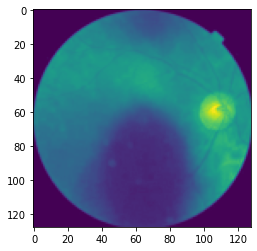

1


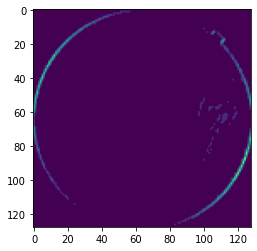

2


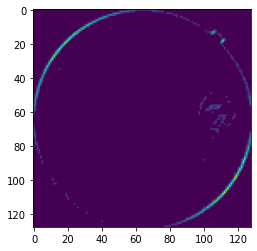

3


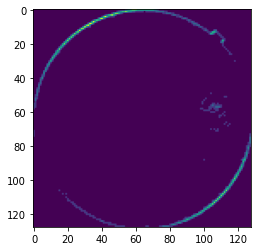

4


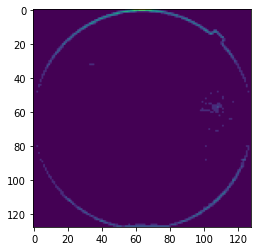

5


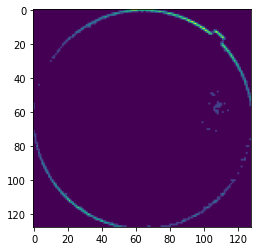

6


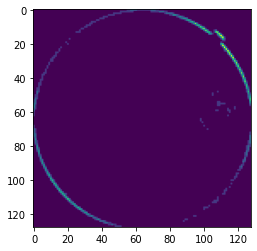

7


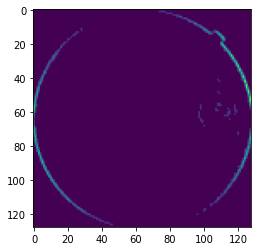

8


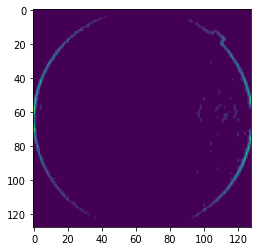

9


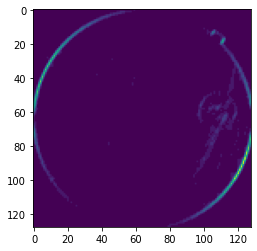

10


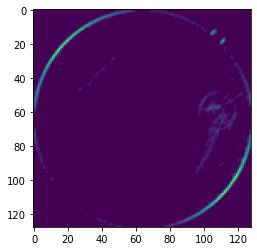

11


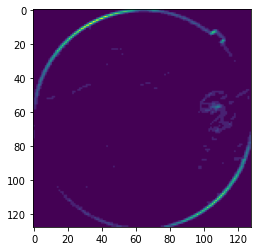

12


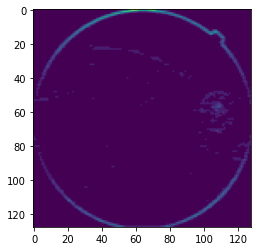

13


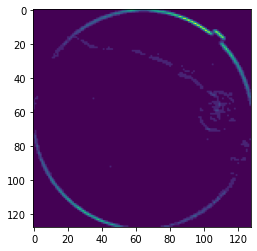

14


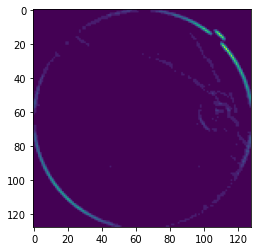

15


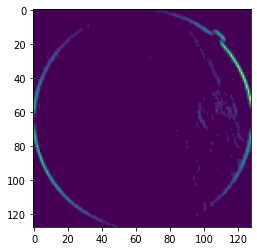

16


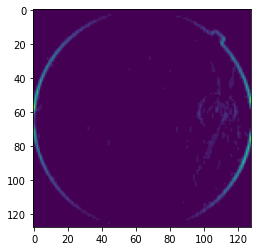

17


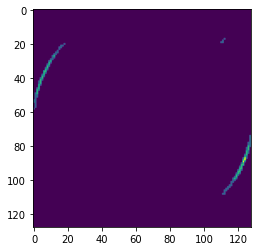

18


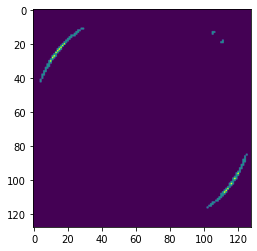

19


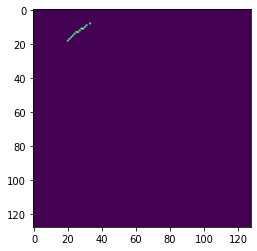

20


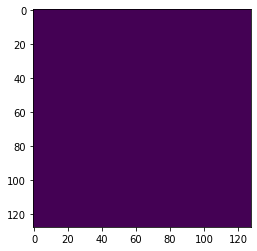

21


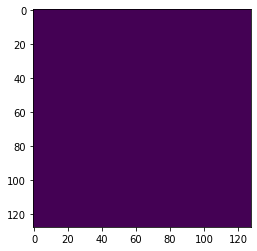

22


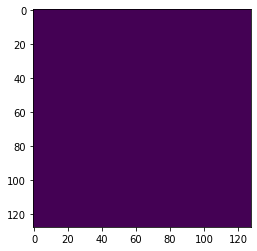

23


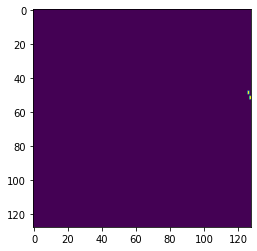

24


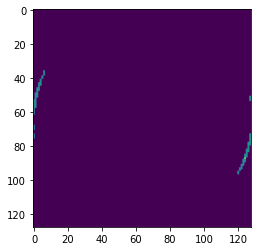

25


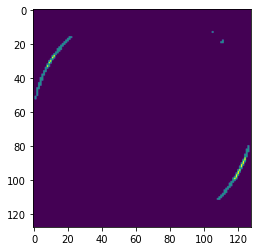

26


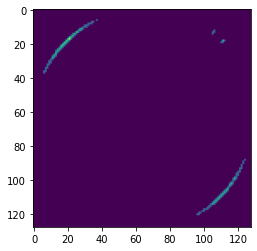

27


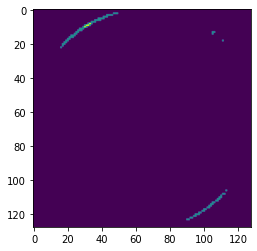

28


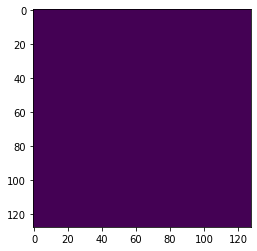

29


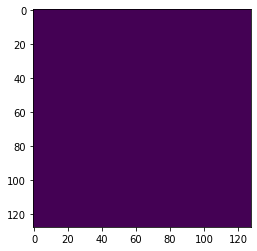

30


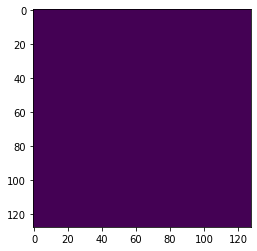

31


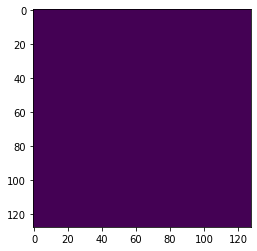

32


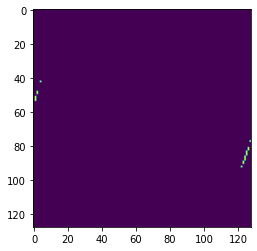

33


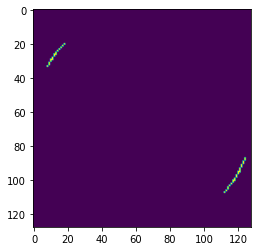

34


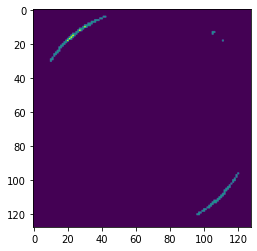

35


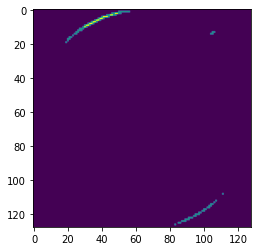

36


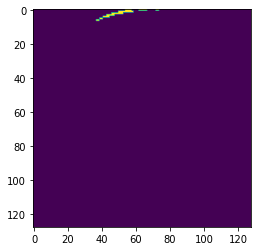

37


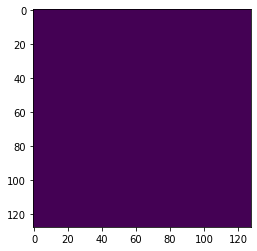

38


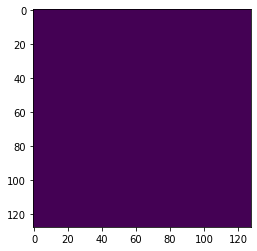

39


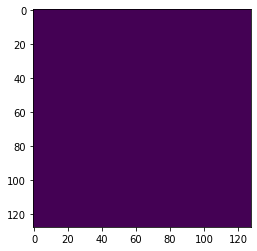

40


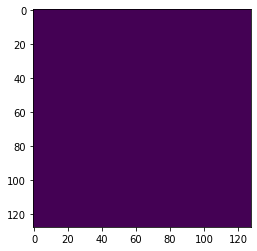

41


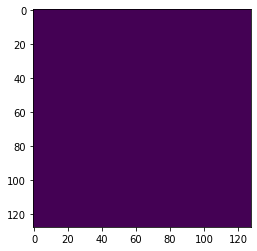

42


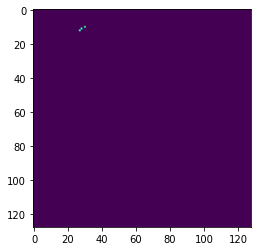

43


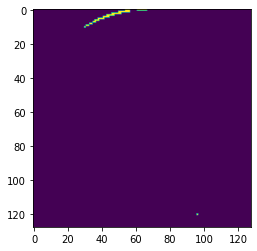

44


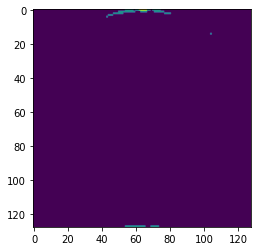

45


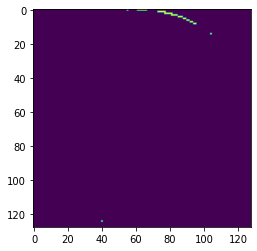

46


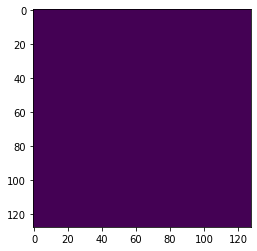

47


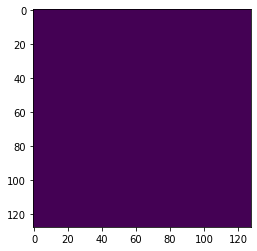

48


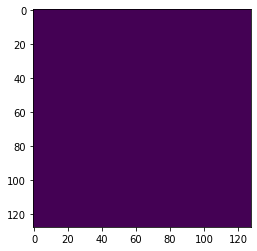

49


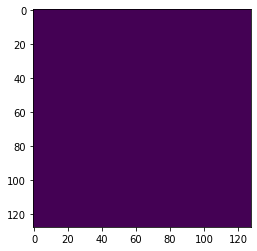

50


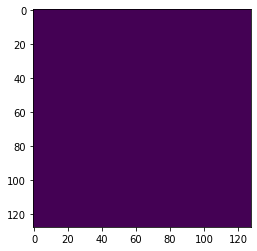

51


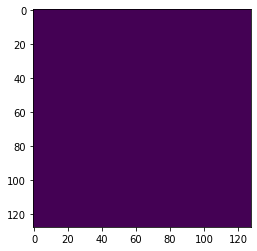

52


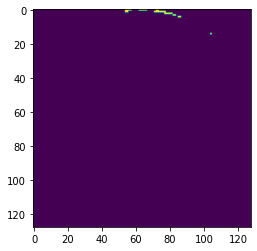

53


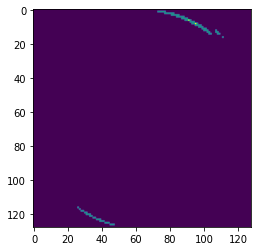

54


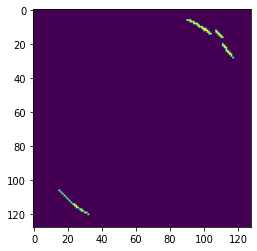

55


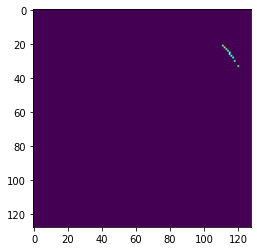

56


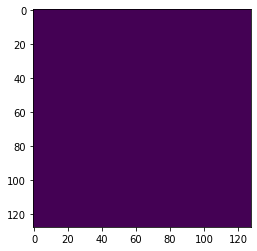

57


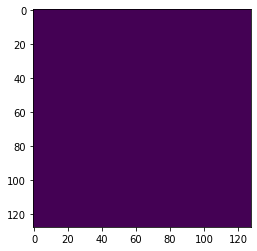

58


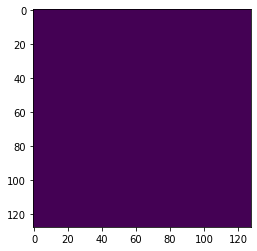

59


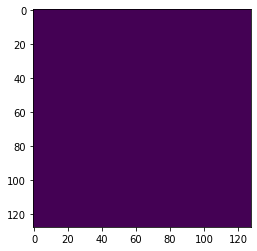

60


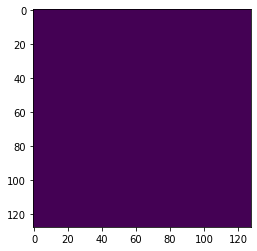

61


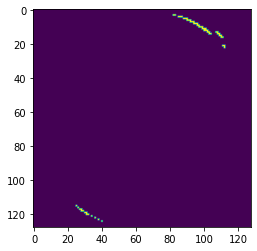

62


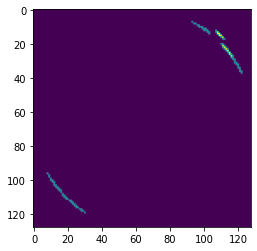

63


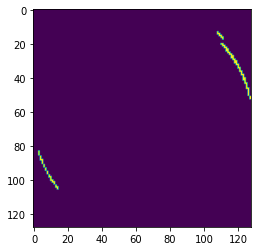

64


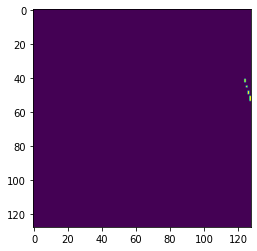

65


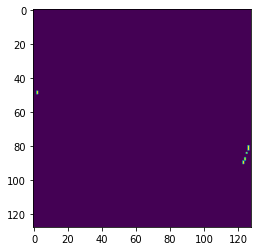

66


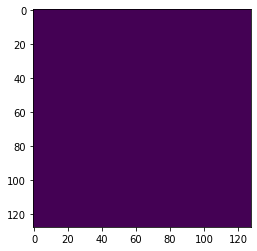

67


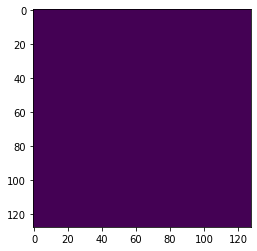

68


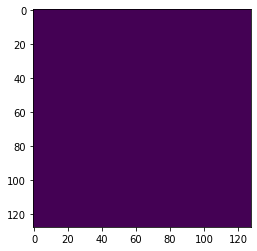

69


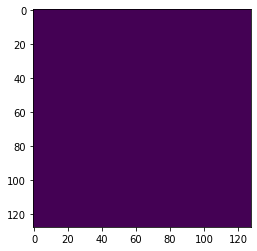

70


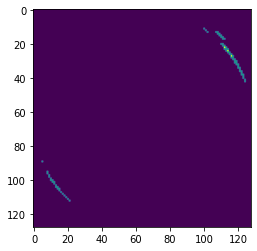

71


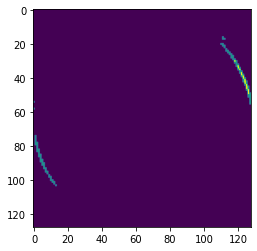

72


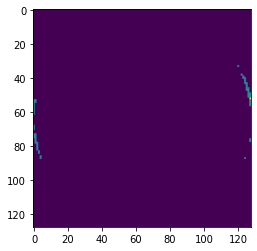

73


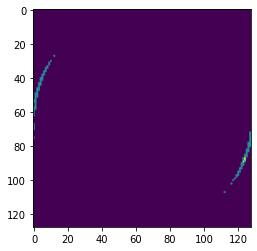

74


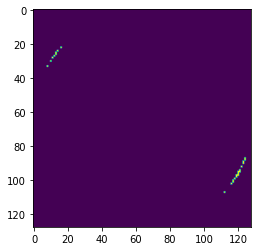

75


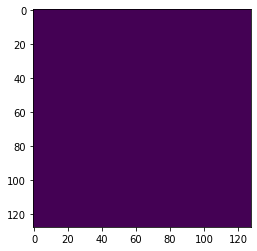

76


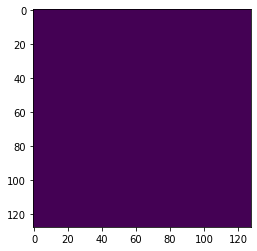

77


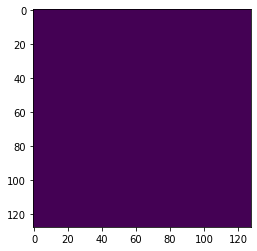

78


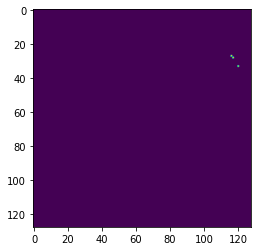

79


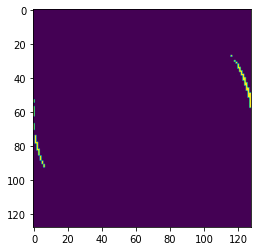

80


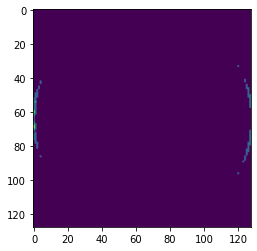

In [10]:
for i in range(81):
  ssample = soutput2a[0,i,:,:]
  test=topilimage(ssample)
  print(i)
  plt.imshow(test)
  plt.show()

### (1-2) original (J=3)
ipynb 코드 자체는 똑같은데, source코드를 수정한 것이라 결과 값만 비교하면 됨

In [8]:
#Scattering2D() - 세팅
J=3
M,N = 512,512
s3a= Scattering2D(J,(M,N),out_type = "array")

soutput3a = s3a.scattering(timg) # scattering
print(len(soutput3a))

3


In [12]:
soutput3a.shape

torch.Size([3, 217, 64, 64])

0


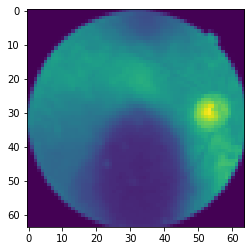

1


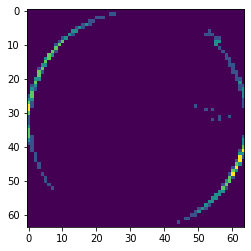

2


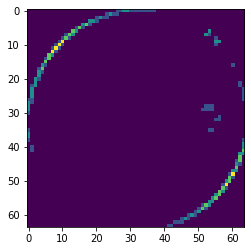

3


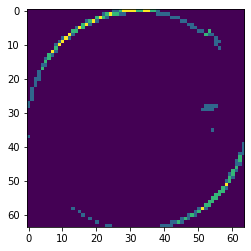

4


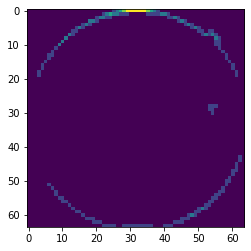

5


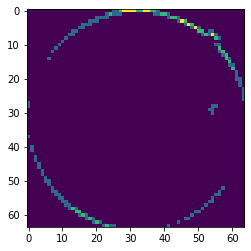

6


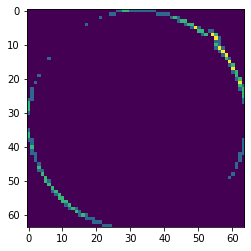

7


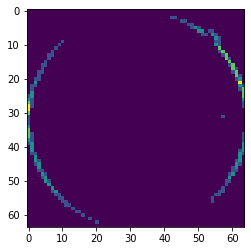

8


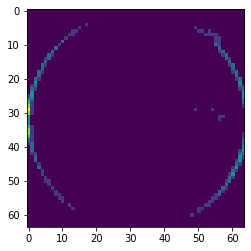

9


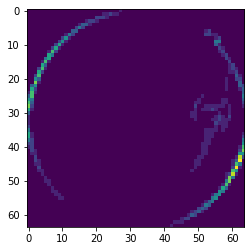

10


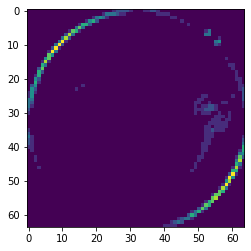

11


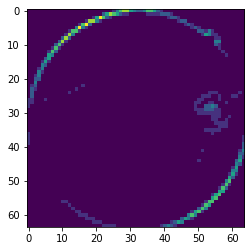

12


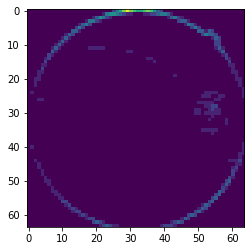

13


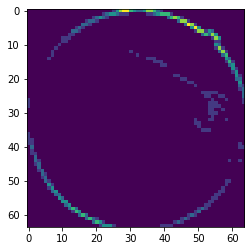

14


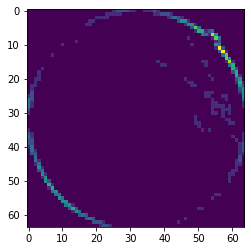

15


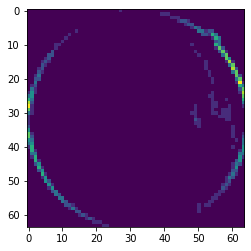

16


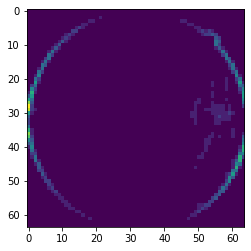

17


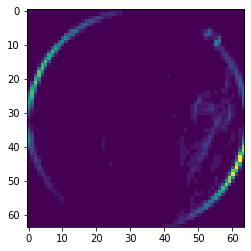

18


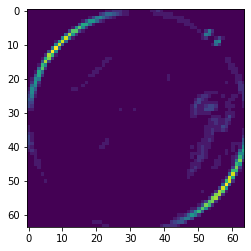

19


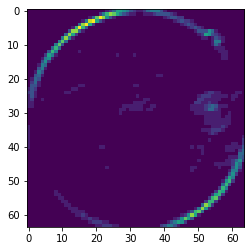

20


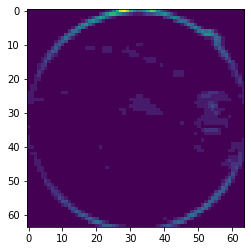

21


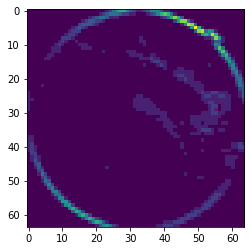

22


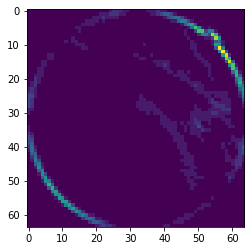

23


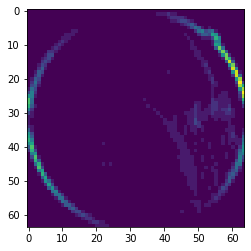

24


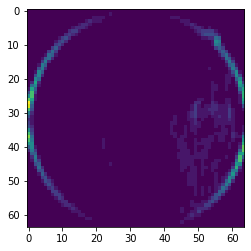

25


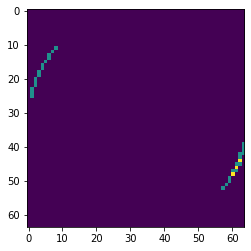

26


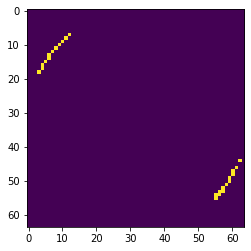

27


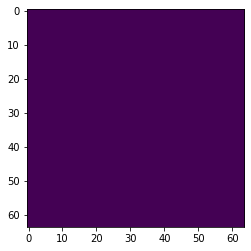

28


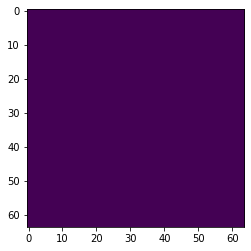

29


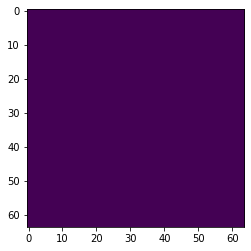

30


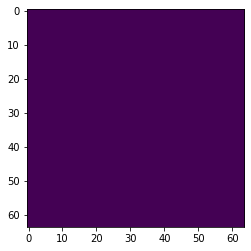

31


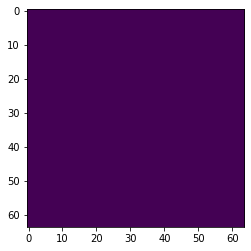

32


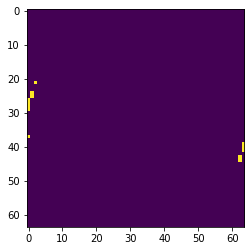

33


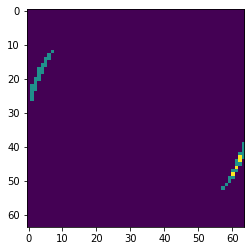

34


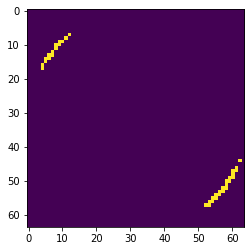

35


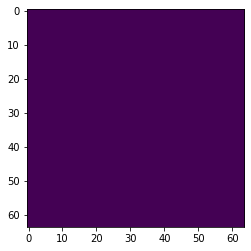

36


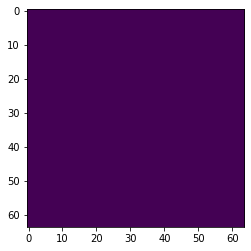

37


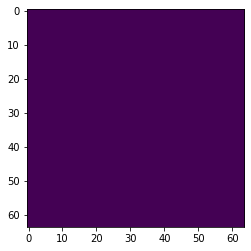

38


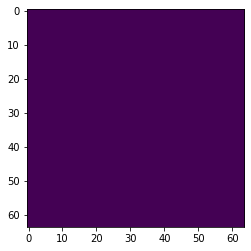

39


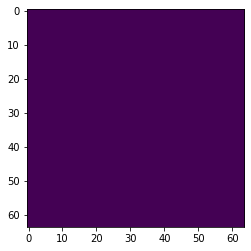

40


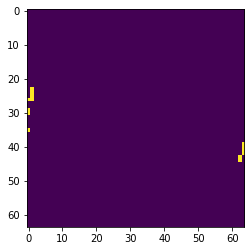

41


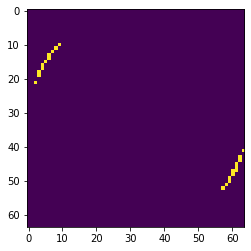

42


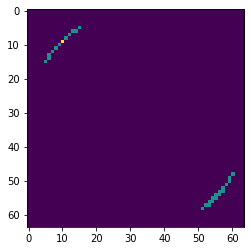

43


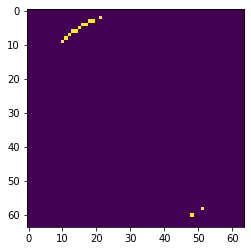

44


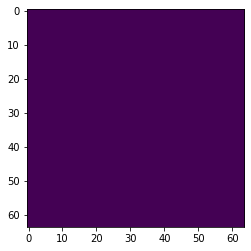

45


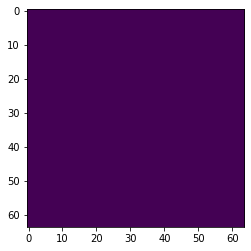

46


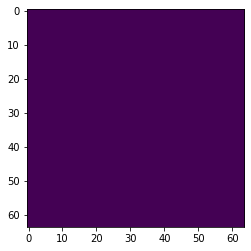

47


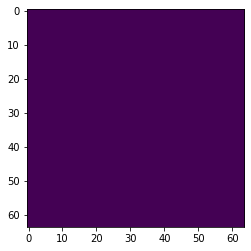

48


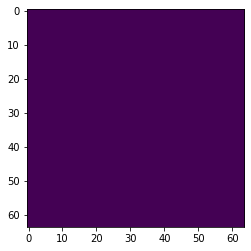

49


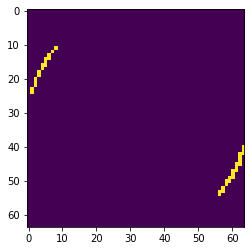

50


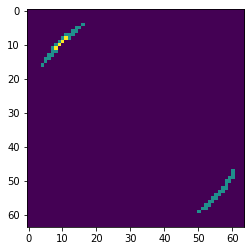

51


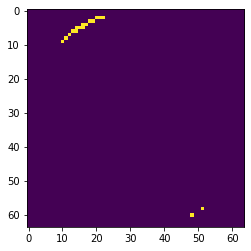

52


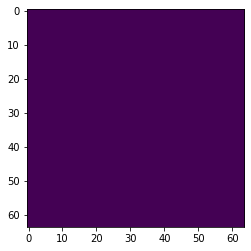

53


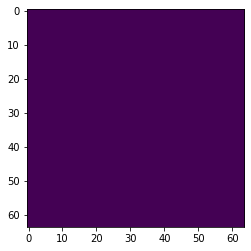

54


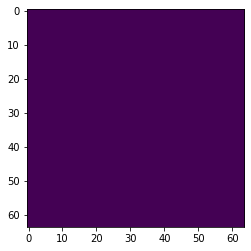

55


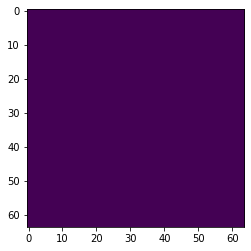

56


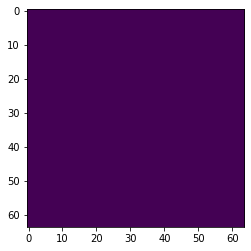

57


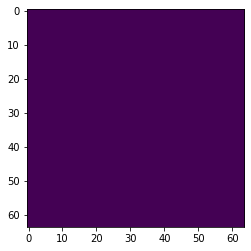

58


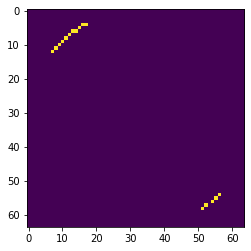

59


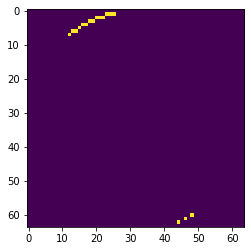

60


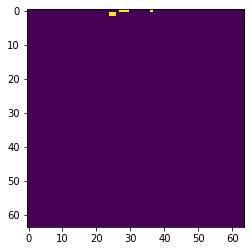

61


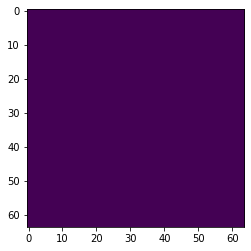

62


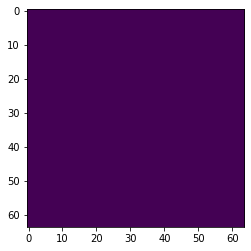

63


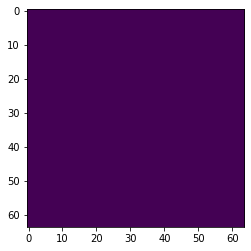

64


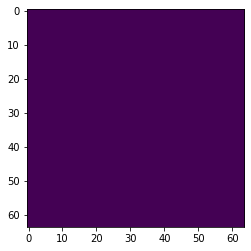

65


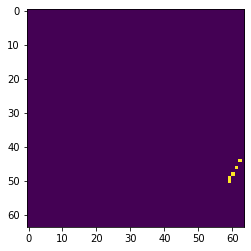

66


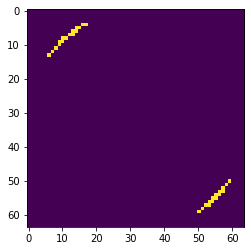

67


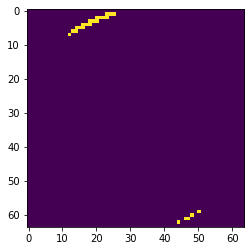

68


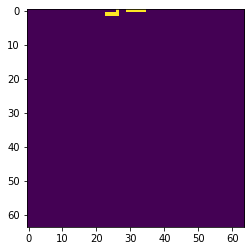

69


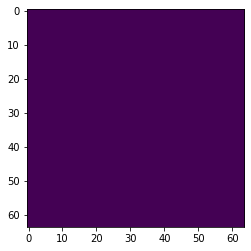

70


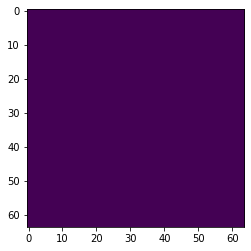

71


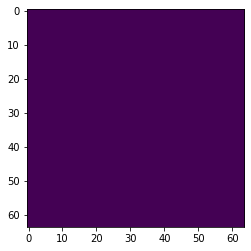

72


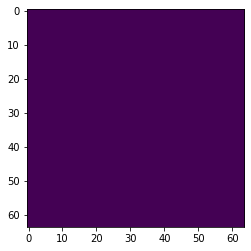

73


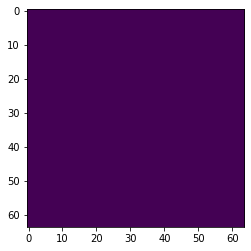

74


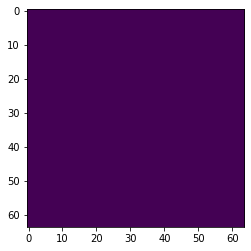

75


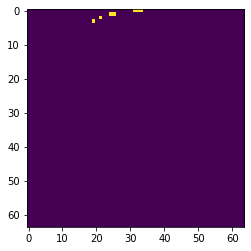

76


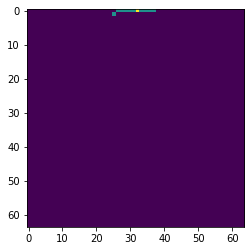

77


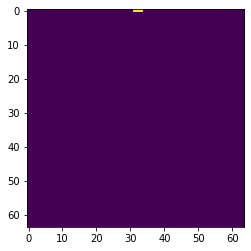

78


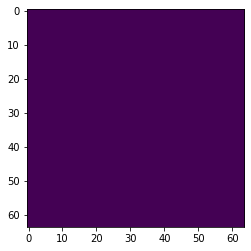

79


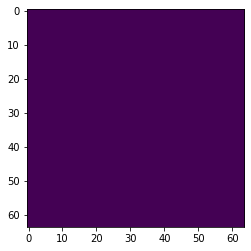

80


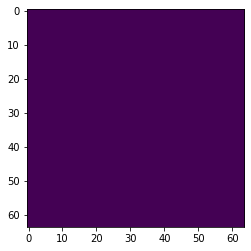

81


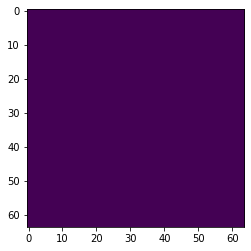

82


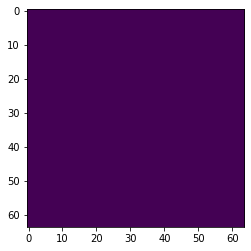

83


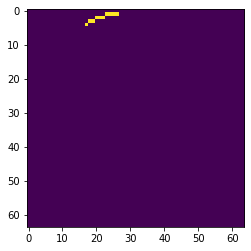

84


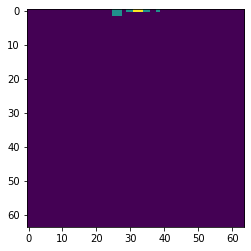

85


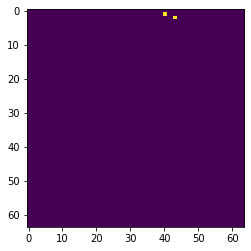

86


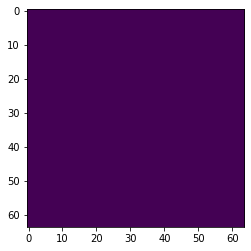

87


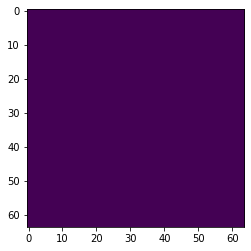

88


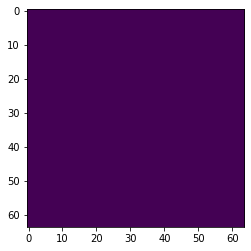

89


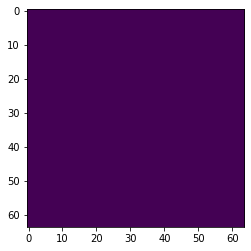

90


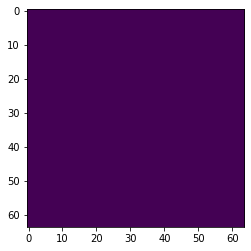

91


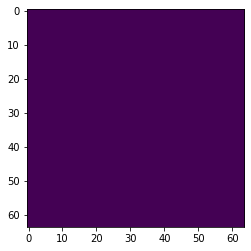

92


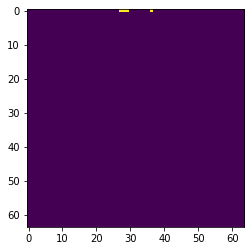

93


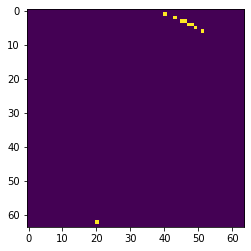

94


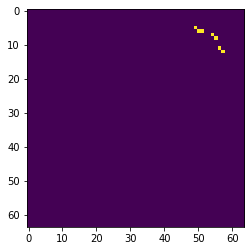

95


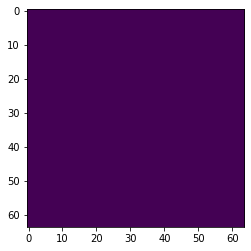

96


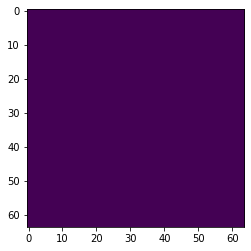

97


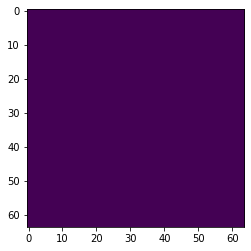

98


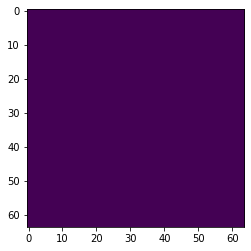

99


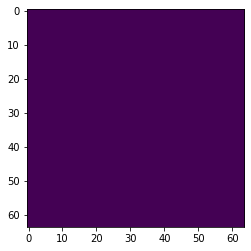

100


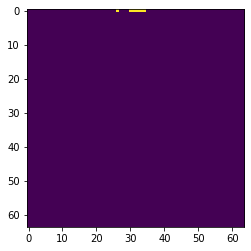

101


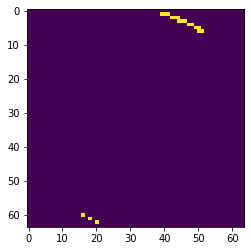

102


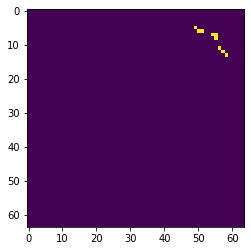

103


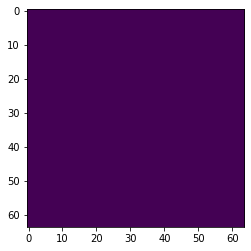

104


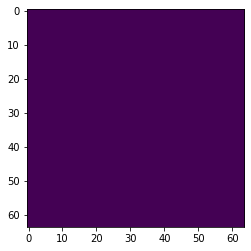

105


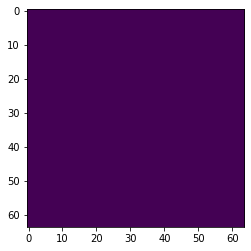

106


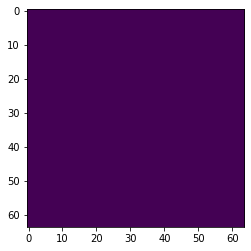

107


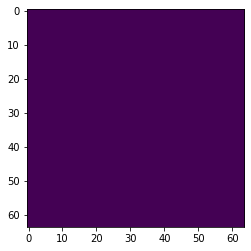

108


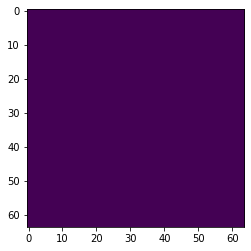

109


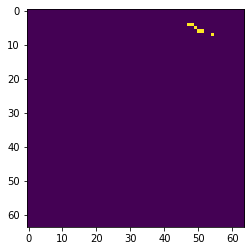

110


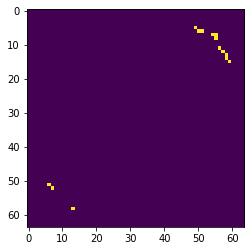

111


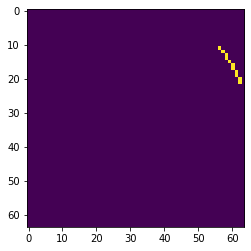

112


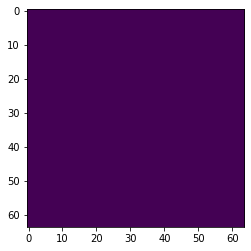

113


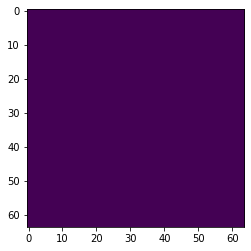

114


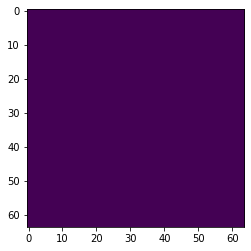

115


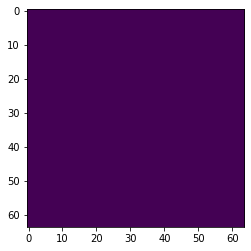

116


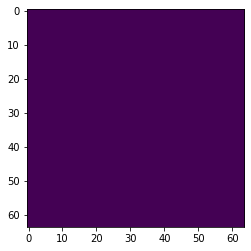

117


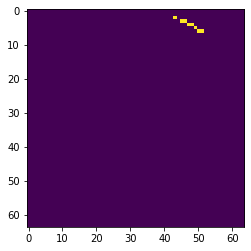

118


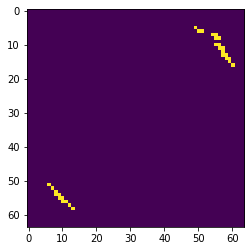

119


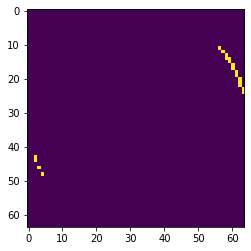

120


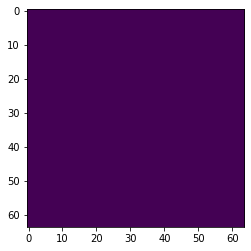

121


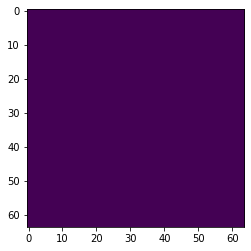

122


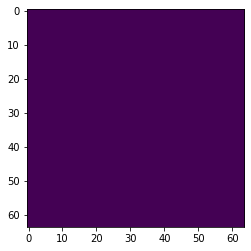

123


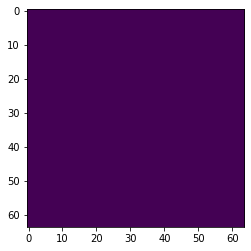

124


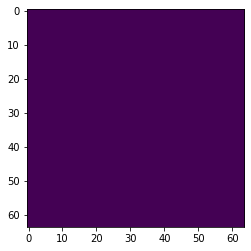

125


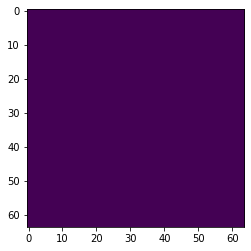

126


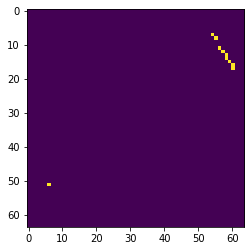

127


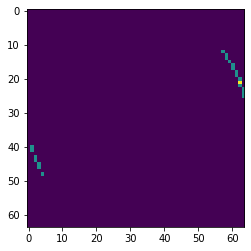

128


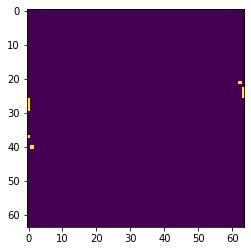

129


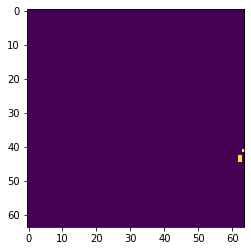

130


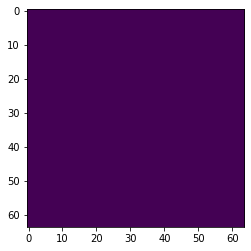

131


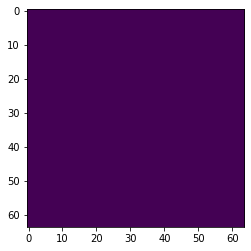

132


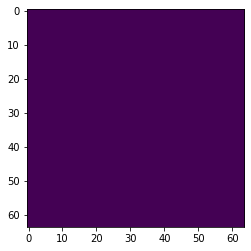

133


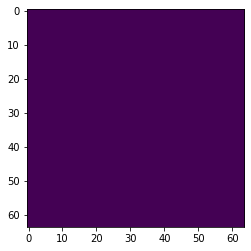

134


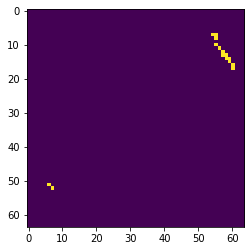

135


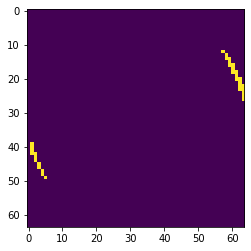

136


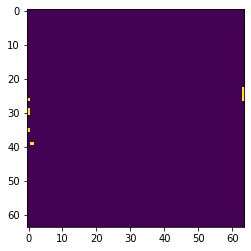

137


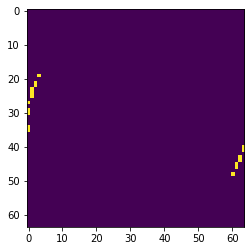

138


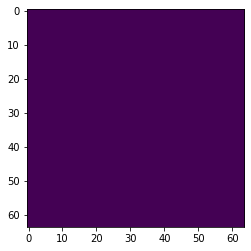

139


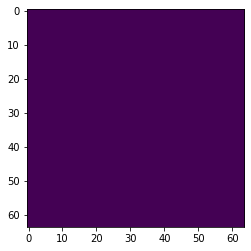

140


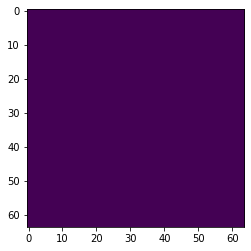

141


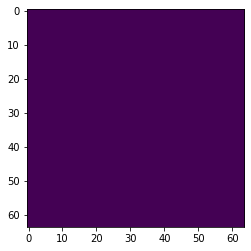

142


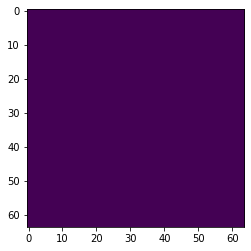

143


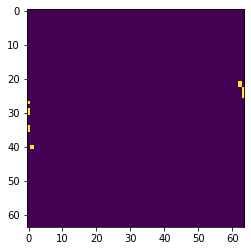

144


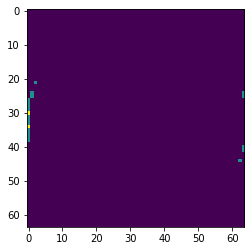

145


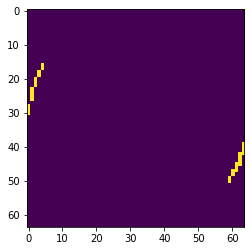

146


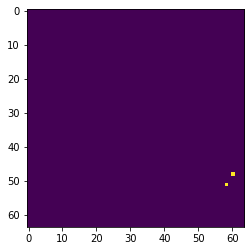

147


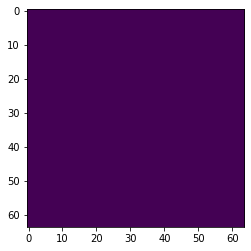

148


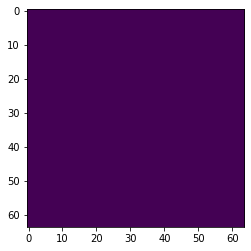

149


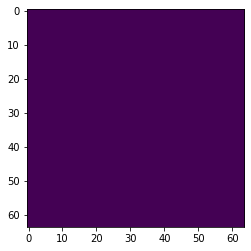

150


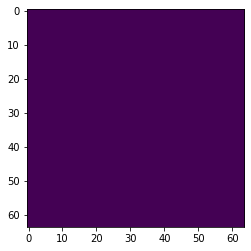

151


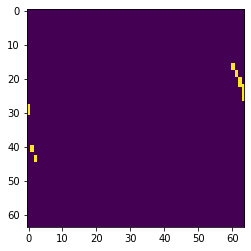

152


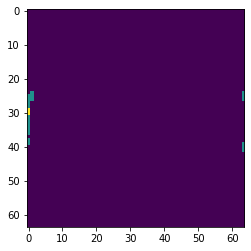

153


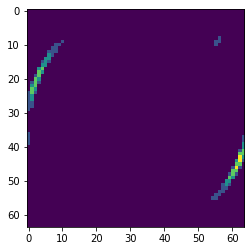

154


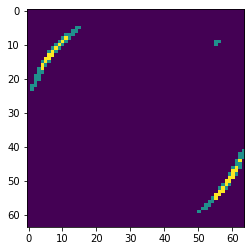

155


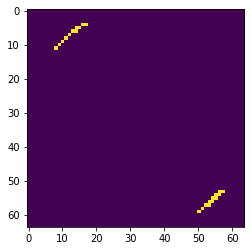

156


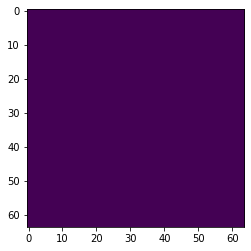

157


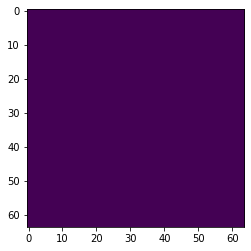

158


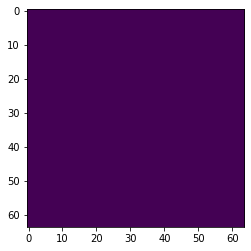

159


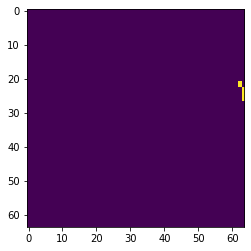

160


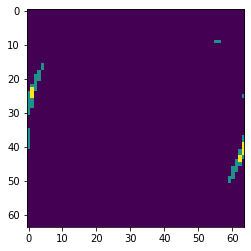

161


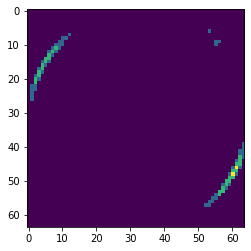

162


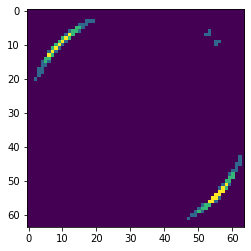

163


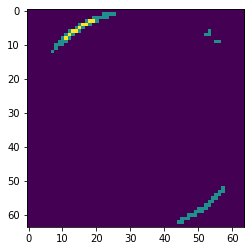

164


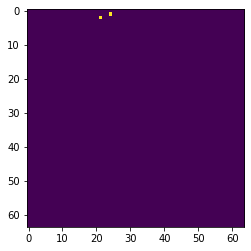

165


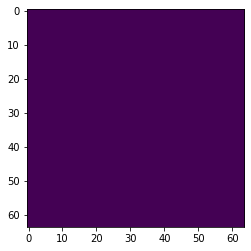

166


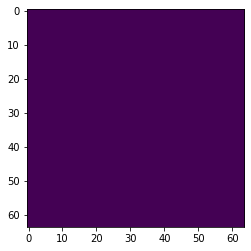

167


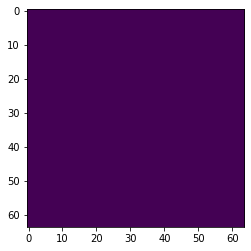

168


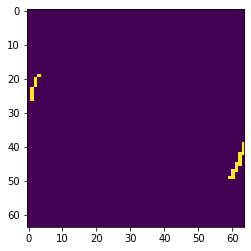

169


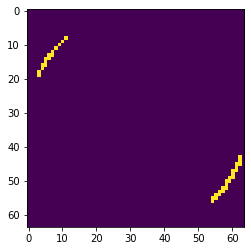

170


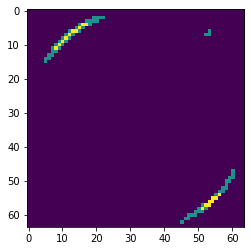

171


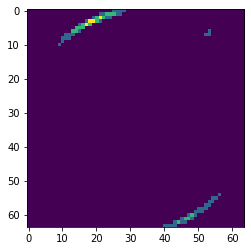

172


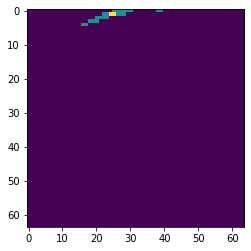

173


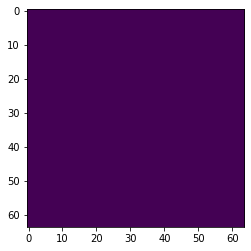

174


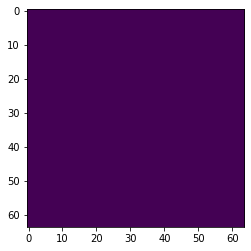

175


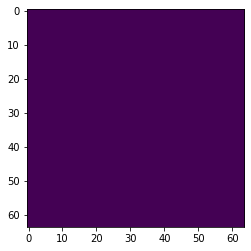

176


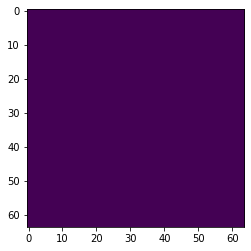

177


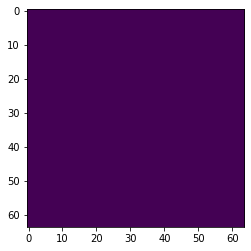

178


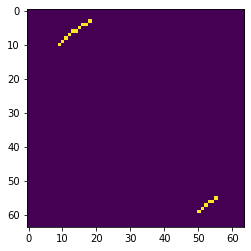

179


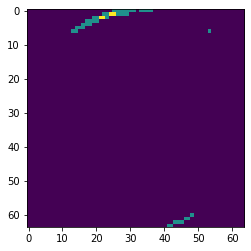

180


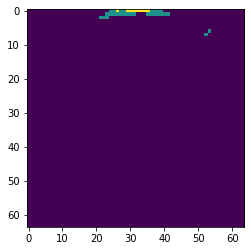

181


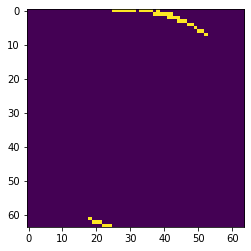

182


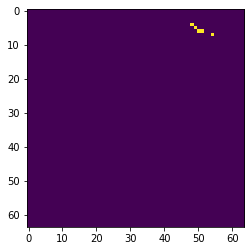

183


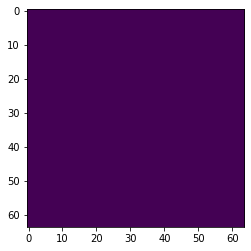

184


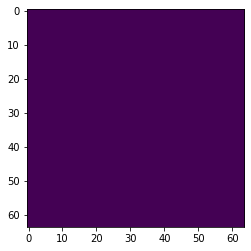

185


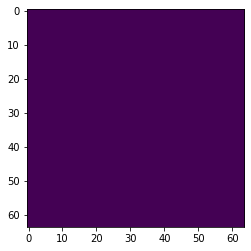

186


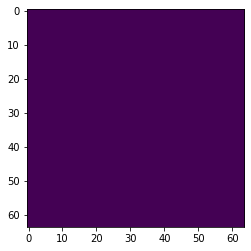

187


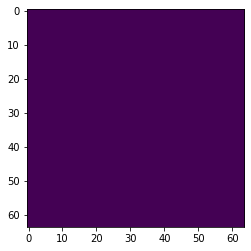

188


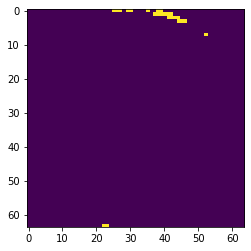

189


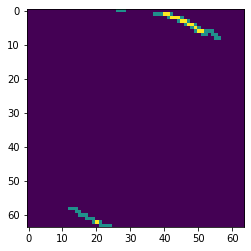

190


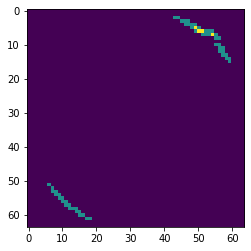

191


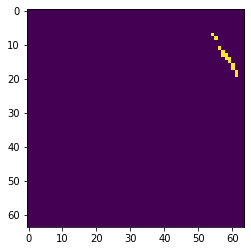

192


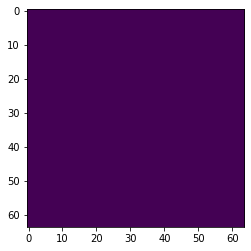

193


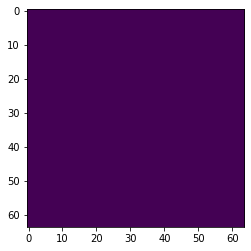

194


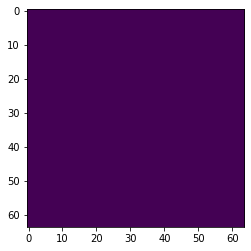

195


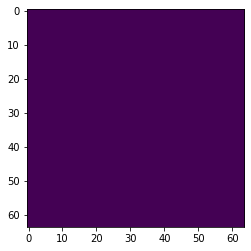

196


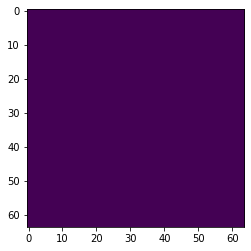

197


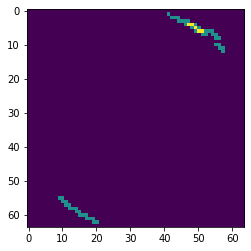

198


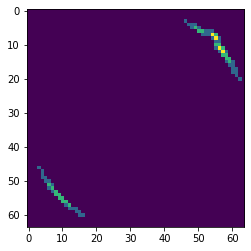

199


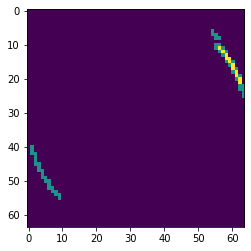

200


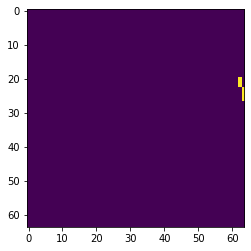

201


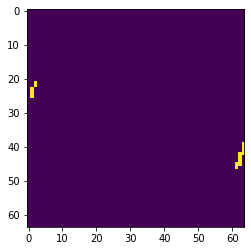

202


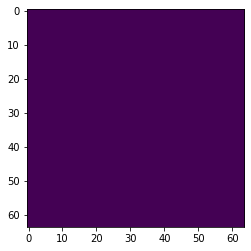

203


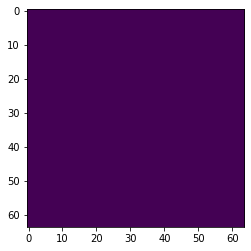

204


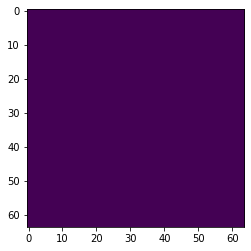

205


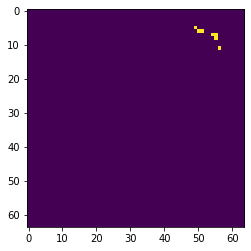

206


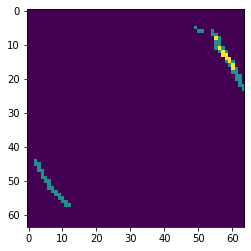

207


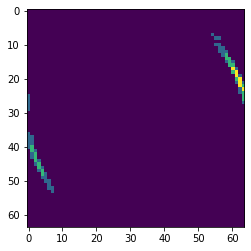

208


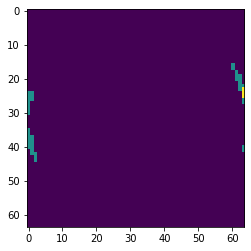

209


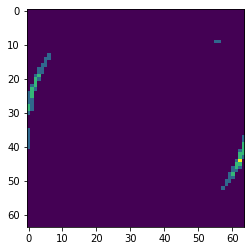

210


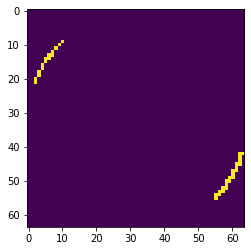

211


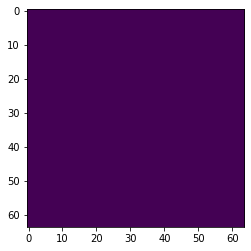

212


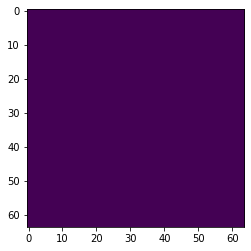

213


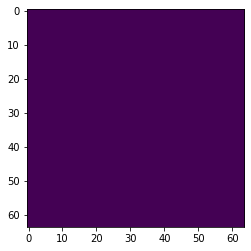

214


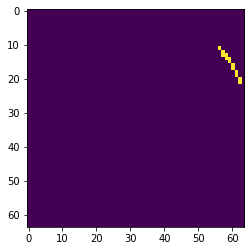

215


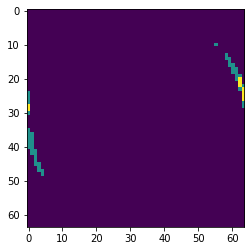

216


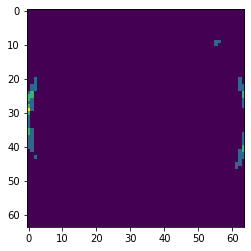

In [13]:
total = soutput3a.shape[1]
for i in range(total):
  ssample = soutput3a[0,i,:,:]
  test=topilimage(ssample)
  print(i)
  plt.imshow(test)
  plt.show()

### (2) 수정 J=2
1) 각 order마다 subsample_fourier의 k를 수정함 (scattering2d_modi.py)
=> 결과 : 정확히 딱딱 맞게 수정은 안했지만, k를 바꿔도 image가 일그러지지 않는다는 것 확인완료 + 각 order마다 다른 shape(W,H)로 출력 가능



In [7]:
#Scattering2D() - 세팅
J=2
M,N = 512,512
s2a= Scattering2D(J,(M,N),out_type = "list")

soutput2a = s2a.scattering(timg) # scattering

x torch.Size([3, 512, 512])
U_r torch.Size([3, 520, 520, 1])
U_0_c torch.Size([3, 520, 520, 2])
U_1_c-cdgmm torch.Size([3, 520, 520, 2])
U_1_c-subsampelf torch.Size([3, 520, 520, 2])
S_0 torch.Size([3, 520, 520, 1])
S_0 torch.Size([3, 518, 518])
--------1----------
U_0_c-start torch.Size([3, 520, 520, 2])
U_1_c-cdgmm torch.Size([3, 520, 520, 2])
U_1_c-ifft torch.Size([3, 520, 520, 2])
U_1_c-modulus torch.Size([3, 520, 520, 1])
U_1_c-rfft torch.Size([3, 520, 520, 2])
S_1_c-cdgmm torch.Size([3, 520, 520, 2])
S_1_c-subsample torch.Size([3, 260, 260, 2])
S_1_r-irfft torch.Size([3, 260, 260, 1])
S_1_r-unpad torch.Size([3, 258, 258])
-----------2-----------
U_1_c-start torch.Size([3, 520, 520, 2])
U_2_c-cdgmm torch.Size([3, 520, 520, 2])
U_2_c-subsample torch.Size([3, 260, 260, 2])
U_2_c-ifft torch.Size([3, 260, 260, 2])
U_2_c-modulus torch.Size([3, 260, 260, 1])
U_2_c-rfft torch.Size([3, 260, 260, 2])
S_2_c-cdgmm torch.Size([3, 260, 260, 2])
S_2_c-subsample torch.Size([3, 130, 130, 2])
S_2_

In [18]:
soutput2a[20]["coef"]
# 다 똑같은 값은 아니였음 

tensor([[[-2.4884e-09,  4.0018e-10,  3.9290e-10,  ...,  3.2815e-09,
           1.3679e-09, -2.5757e-09],
         [-2.4011e-09,  4.8021e-10,  4.7294e-10,  ...,  3.2232e-09,
           1.5207e-09, -2.3865e-09],
         [-2.3647e-09,  5.4570e-10,  4.8749e-10,  ...,  3.1578e-09,
           1.5643e-09, -2.3065e-09],
         ...,
         [-2.3524e-09,  5.3292e-10,  4.6961e-10,  ...,  3.6093e-09,
           1.3293e-09, -2.6292e-09],
         [-2.4668e-09,  4.5702e-10,  3.9093e-10,  ...,  3.4959e-09,
           1.3681e-09, -2.5721e-09],
         [-2.5274e-09,  3.6443e-10,  3.7678e-10,  ...,  3.3836e-09,
           1.2758e-09, -2.6592e-09]],

        [[-1.1205e-09,  9.6043e-10, -2.1828e-10,  ...,  2.0409e-09,
           1.1423e-09,  3.2014e-10],
         [-1.0914e-09,  1.0259e-09, -1.8917e-10,  ...,  1.8917e-09,
           1.2660e-09,  5.8935e-10],
         [-1.0550e-09,  1.0768e-09, -1.9645e-10,  ...,  2.0300e-09,
           1.4697e-09,  6.3301e-10],
         ...,
         [-1.0993e-09,  1

0


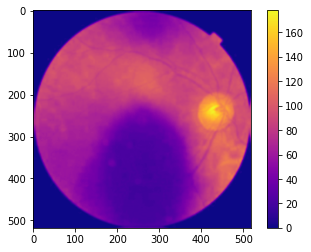

1


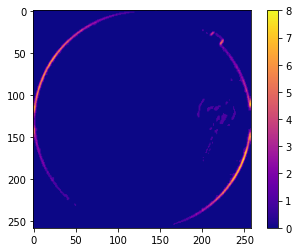

2


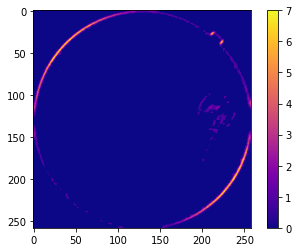

3


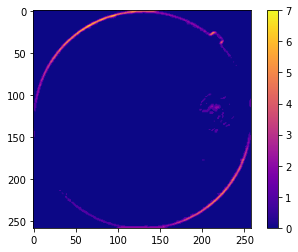

4


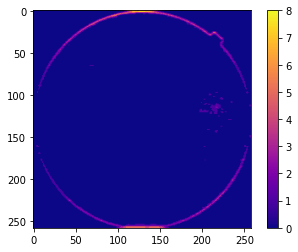

5


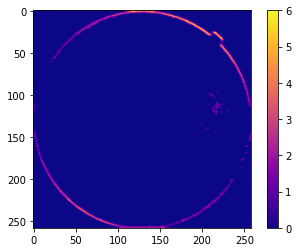

6


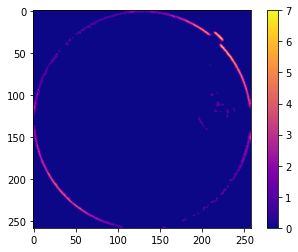

7


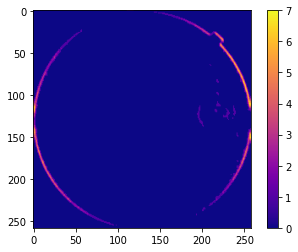

8


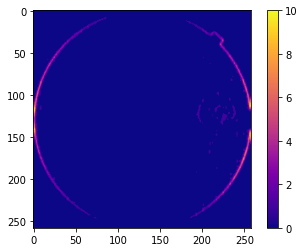

9


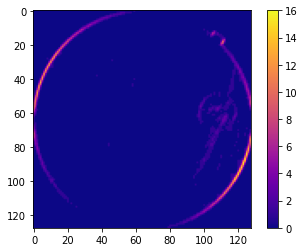

10


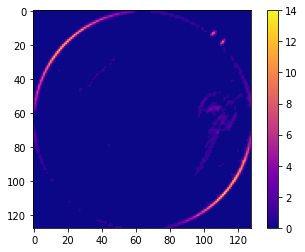

11


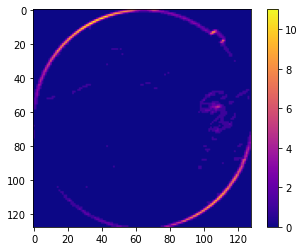

12


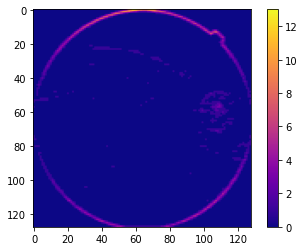

13


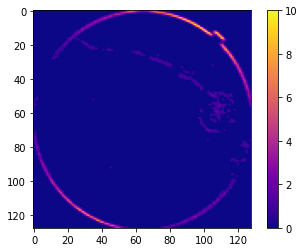

14


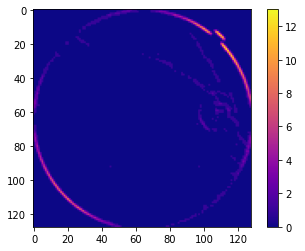

15


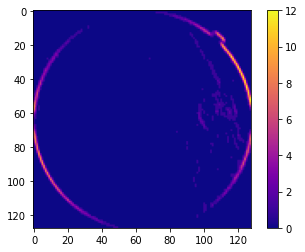

16


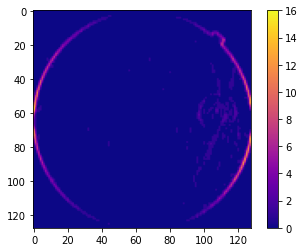

17


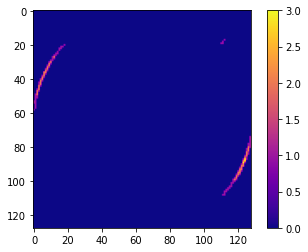

18


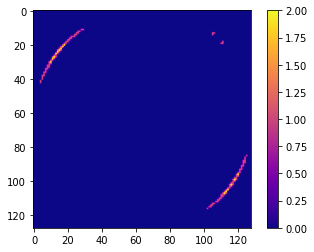

19


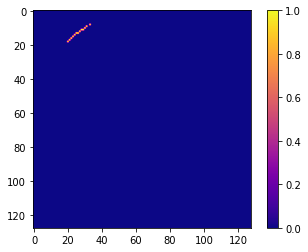

20


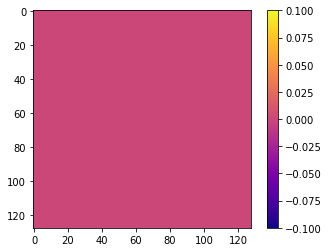

21


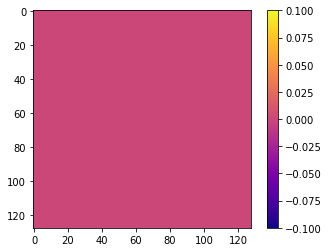

22


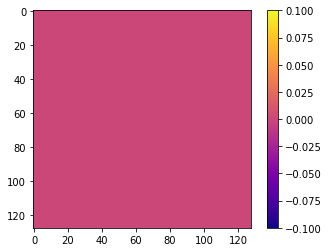

23


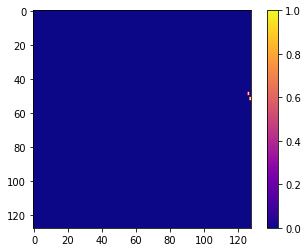

24


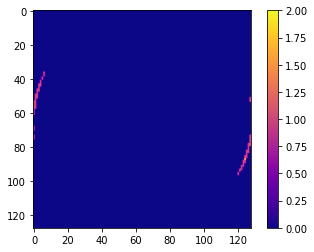

25


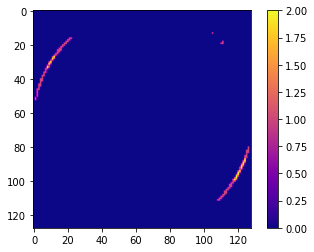

26


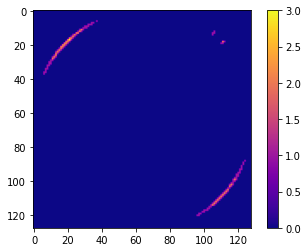

27


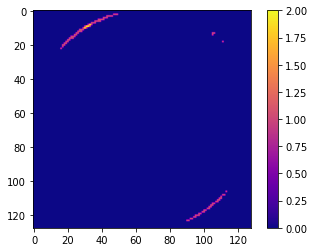

28


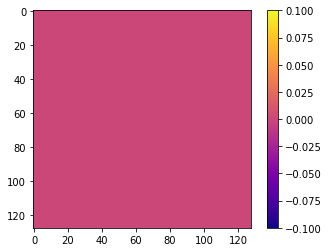

29


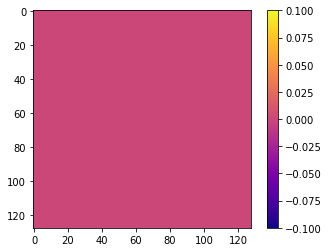

30


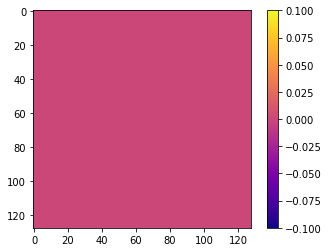

31


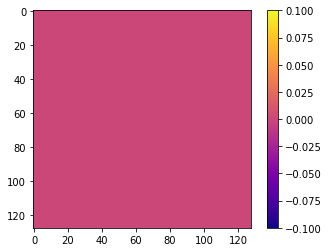

32


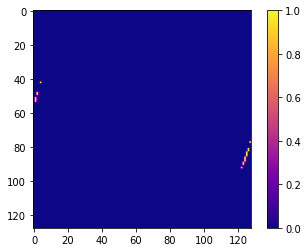

33


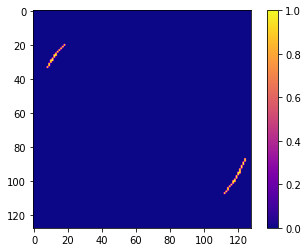

34


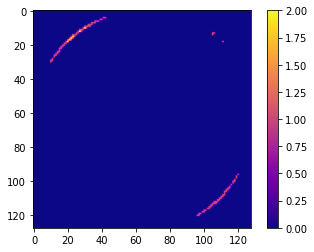

35


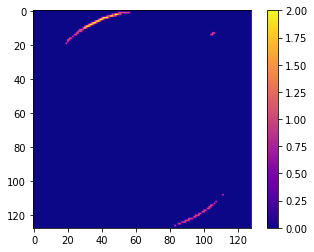

36


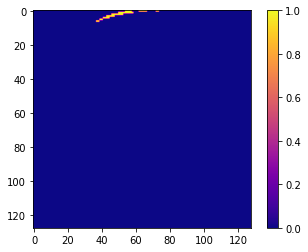

37


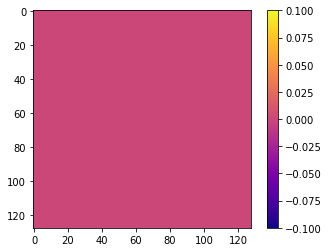

38


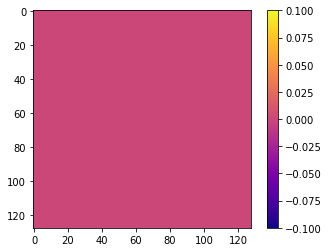

39


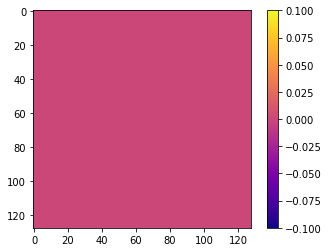

40


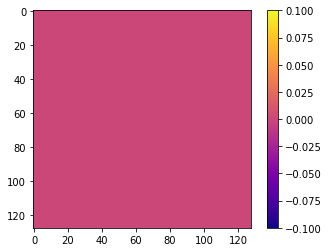

41


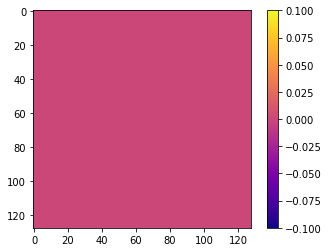

42


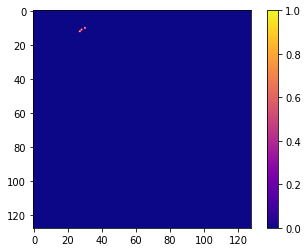

43


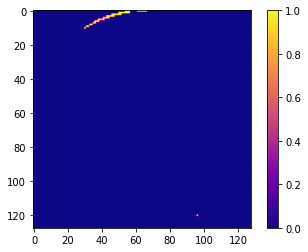

44


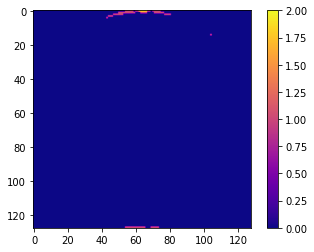

45


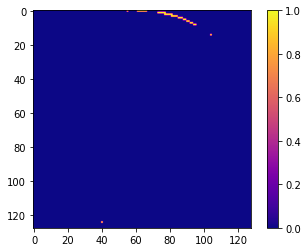

46


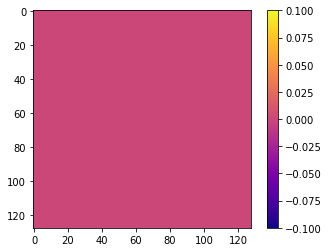

47


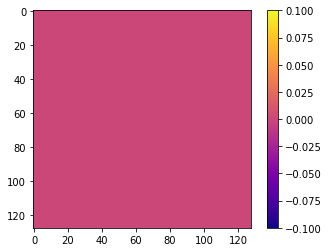

48


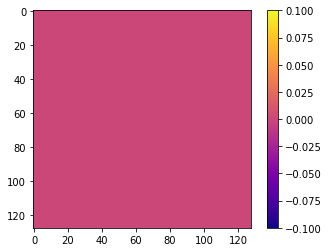

49


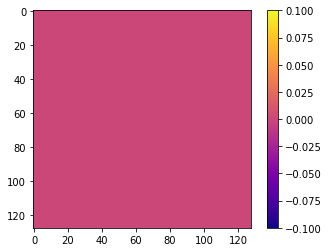

50


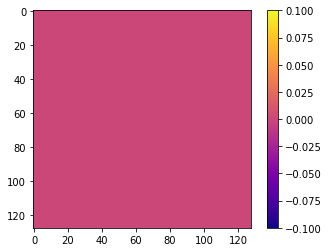

51


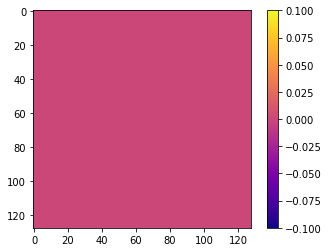

52


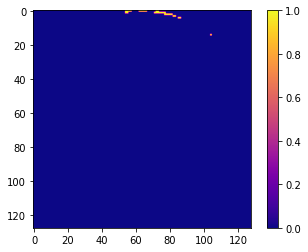

53


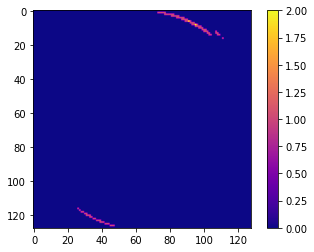

54


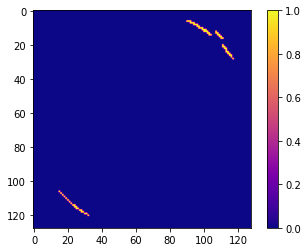

55


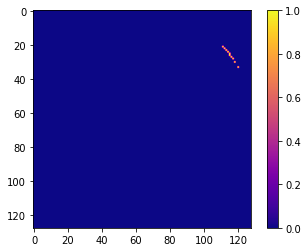

56


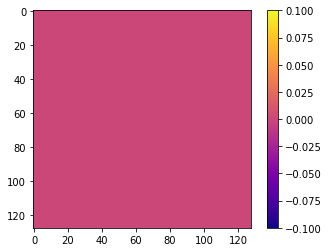

57


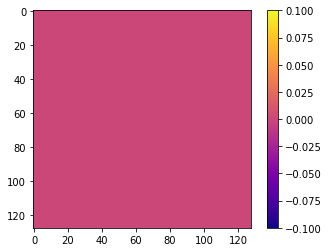

58


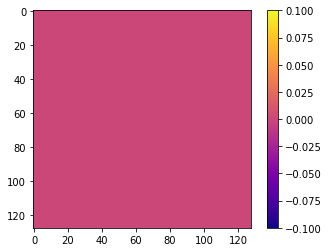

59


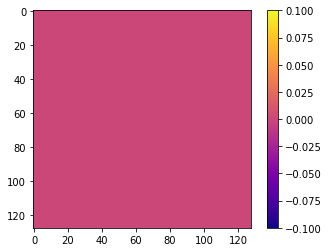

60


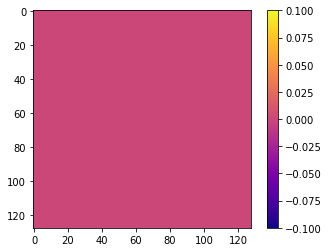

61


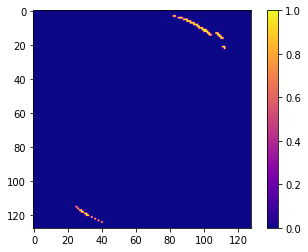

62


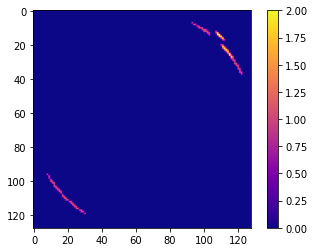

63


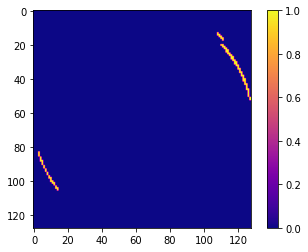

64


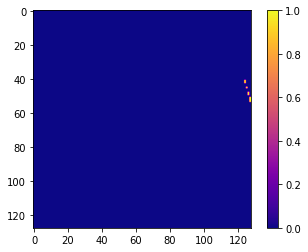

65


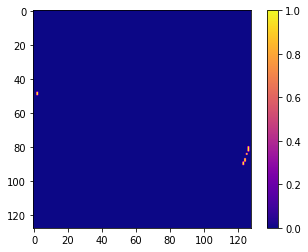

66


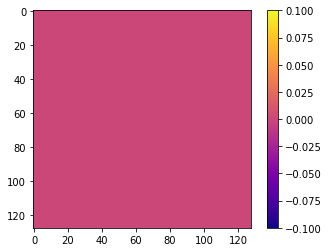

67


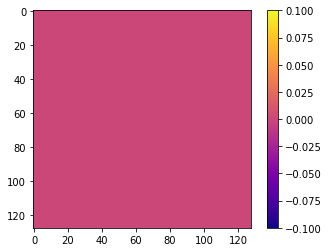

68


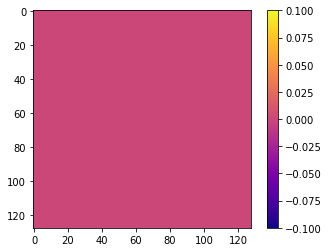

69


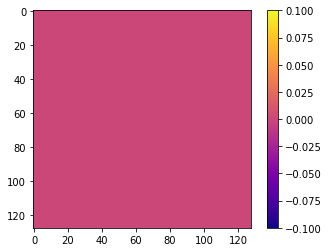

70


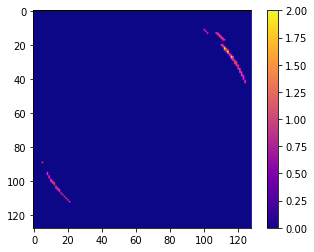

71


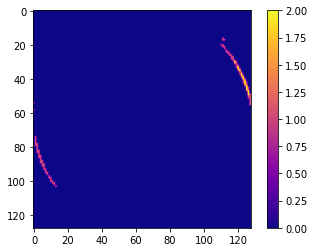

72


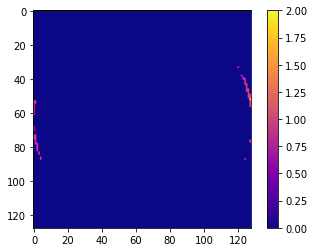

73


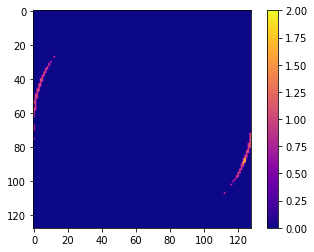

74


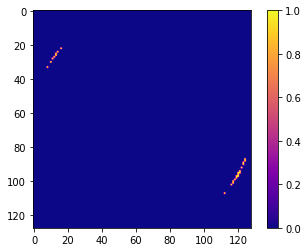

75


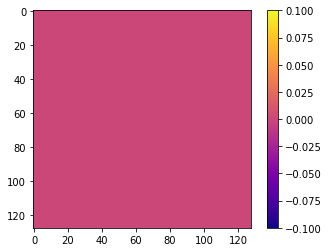

76


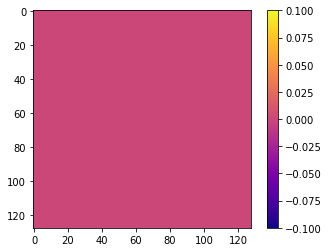

77


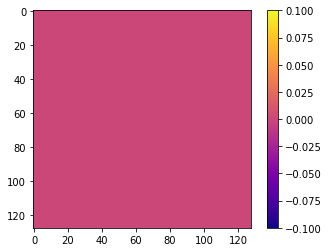

78


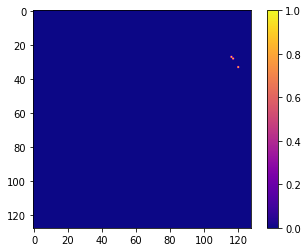

79


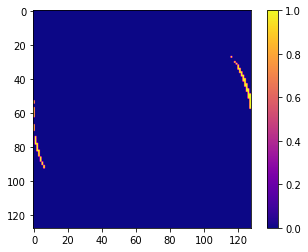

80


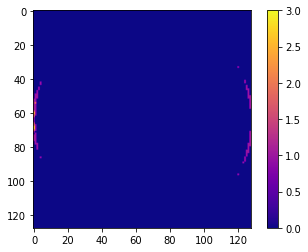

In [11]:
for i in range(81):
  ssample = soutput2a[i]['coef'][0,:,:]
  test=topilimage(ssample)
  print(i)
  plt.imshow(test,cmap='plasma')
  plt.colorbar()
  # plt.clim(0.00,0.00000000000001)
  plt.show()

### (2-2) 수정 J=2
2) subsameple fourier와 low pass filter를 사용 X


* modify2.py
- pad는 J만큼, unpad는 -2만큼 됨. (subsample_forier로 size를 반씩 줄여와서 -2만 하면 됐음)  
    하지만, 그래서 subsample fourier와 low pass filter를 모두 없애면, size 때문에 문제가 생김  
- 그래서 pad와 unpad를 모두 없애면, filter의 크기는 image에 pad를 한 것과 크기를 맞춰났기때문에 문제가 생김.  
- (1) filter를 원래 input size로 맞추거나, (2) pad를 원래대로 사용하고, subsample도 사용하고, low pass filter만 사용하지 않는 방향으로.

In [7]:
#Scattering2D() - 세팅
J=2
M,N = 512,512
s22= Scattering2D(J,(M,N),out_type = "list")

soutput22 = s22.scattering(timg) # scattering


x torch.Size([3, 512, 512])
U_r torch.Size([3, 520, 520, 1])
U_0_c torch.Size([3, 520, 520, 2])
U_1_c-cdgmm torch.Size([3, 520, 520, 2])
U_1_c-subsampelf torch.Size([3, 520, 520, 2])
S_0 torch.Size([3, 520, 520, 1])
S_0 torch.Size([3, 518, 518])
--------1----------
U_0_c-start torch.Size([3, 520, 520, 2])
U_1_c-cdgmm torch.Size([3, 520, 520, 2])
U_1_c-ifft torch.Size([3, 520, 520, 2])
U_1_c-modulus torch.Size([3, 520, 520, 1])
U_1_c-rfft torch.Size([3, 520, 520, 2])
S_1_c-subsample torch.Size([3, 260, 260, 2])
S_1_r-irfft torch.Size([3, 260, 260, 1])
S_1_r-unpad torch.Size([3, 258, 258])
-----------2-----------
U_1_c-start torch.Size([3, 520, 520, 2])
U_2_c-cdgmm torch.Size([3, 520, 520, 2])
U_2_c-subsample torch.Size([3, 260, 260, 2])
U_2_c-ifft torch.Size([3, 260, 260, 2])
U_2_c-modulus torch.Size([3, 260, 260, 1])
U_2_c-rfft torch.Size([3, 260, 260, 2])
S_2_c-subsample torch.Size([3, 130, 130, 2])
S_2_r-irfft torch.Size([3, 130, 130, 1])
S_2_r-unpad torch.Size([3, 128, 128])
U_1_c-s

0


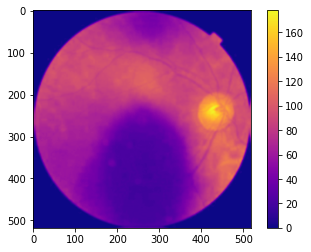

1


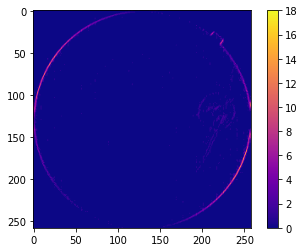

2


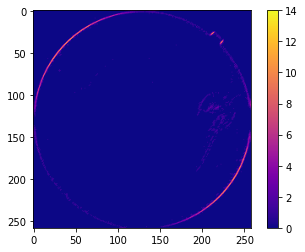

3


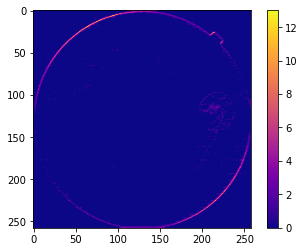

4


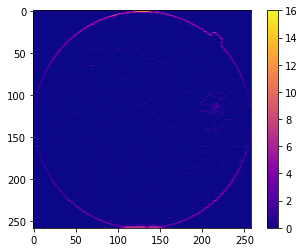

5


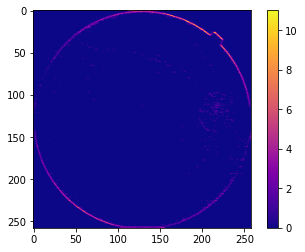

6


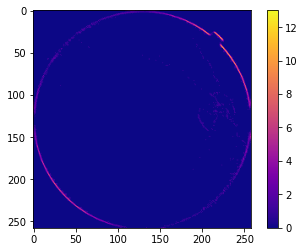

7


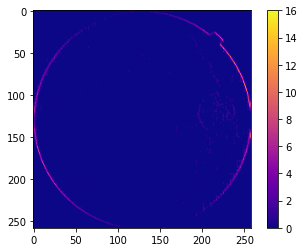

8


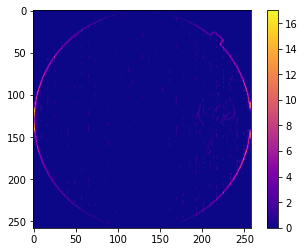

9


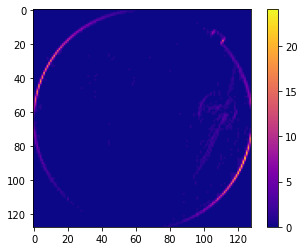

10


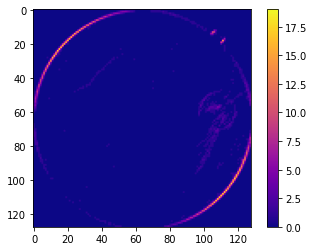

11


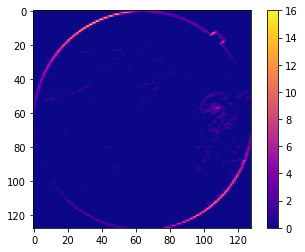

12


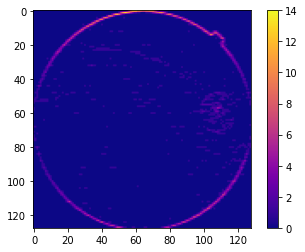

13


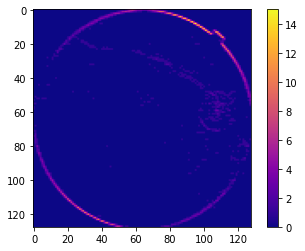

14


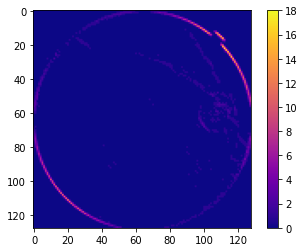

15


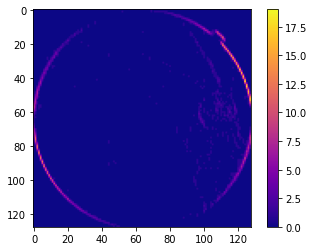

16


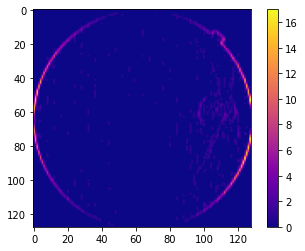

17


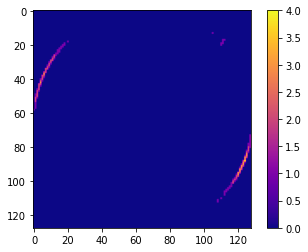

18


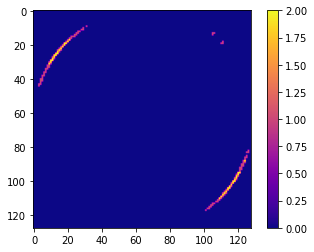

19


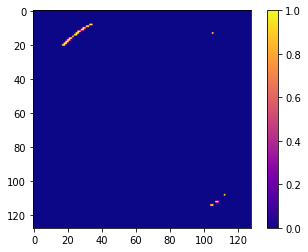

20


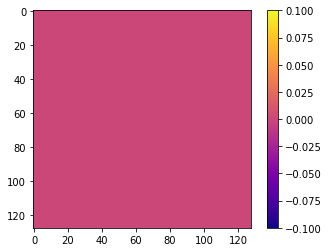

21


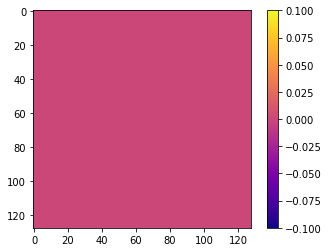

22


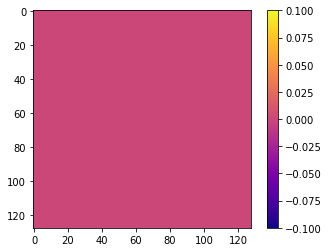

23


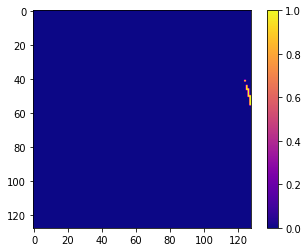

24


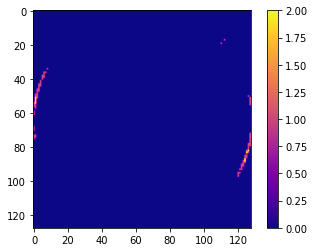

25


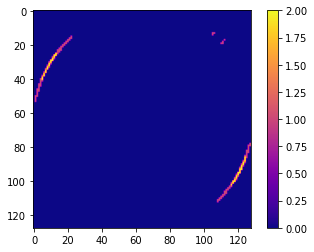

26


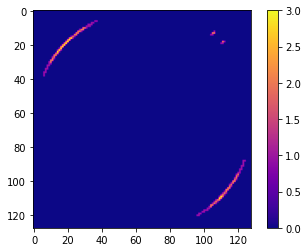

27


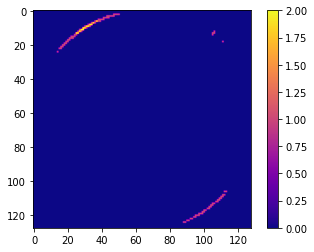

28


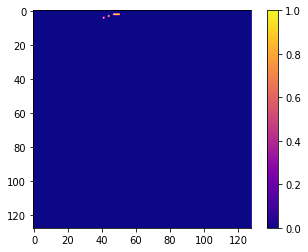

29


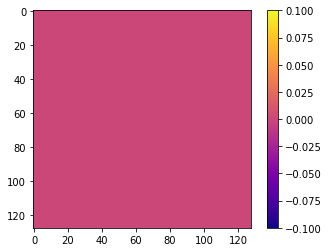

30


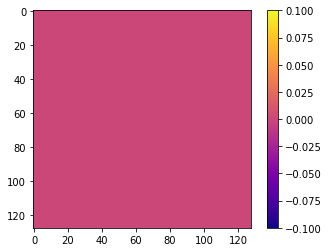

31


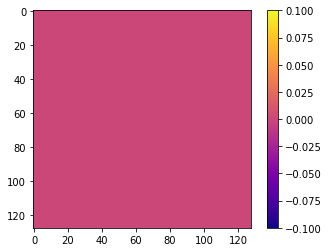

32


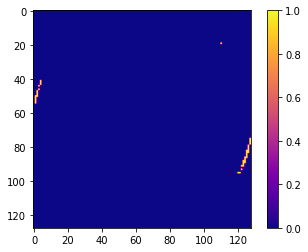

33


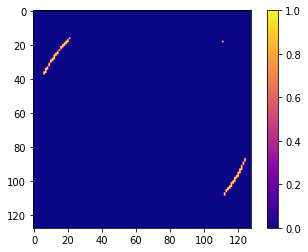

34


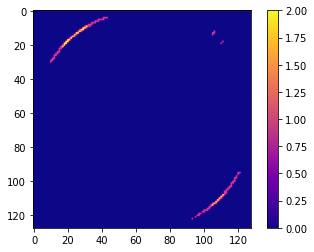

35


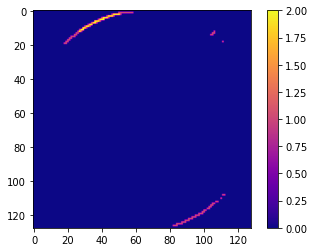

36


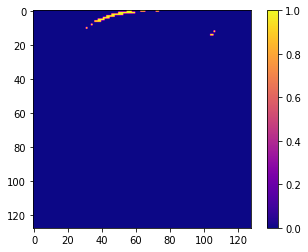

37


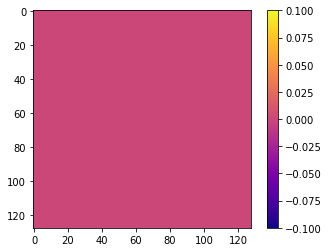

38


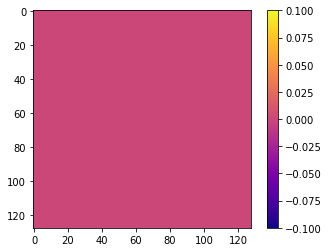

39


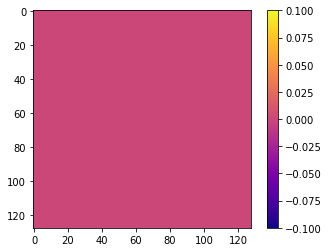

40


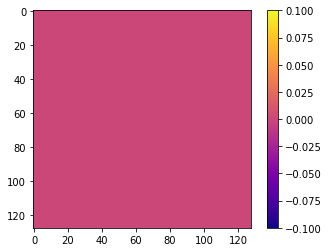

41


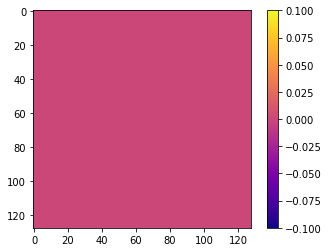

42


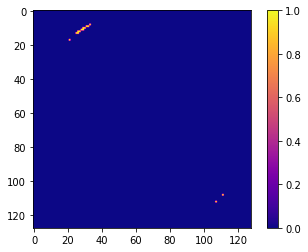

43


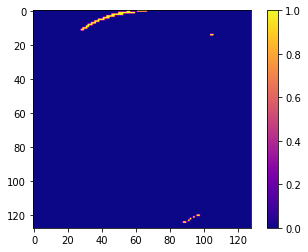

44


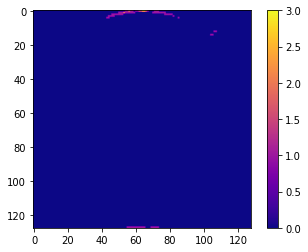

45


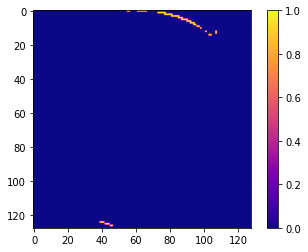

46


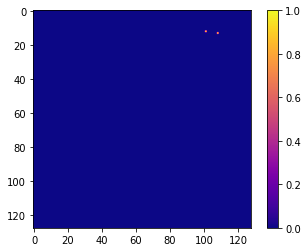

47


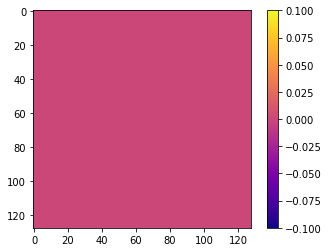

48


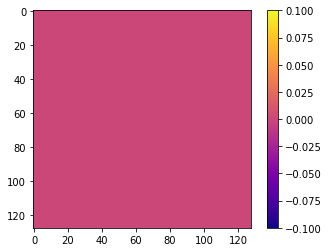

49


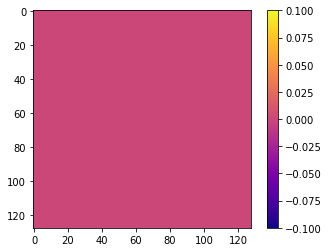

50


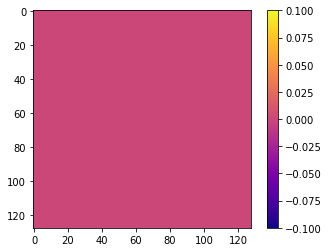

51


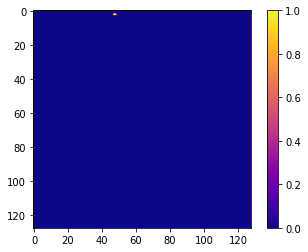

52


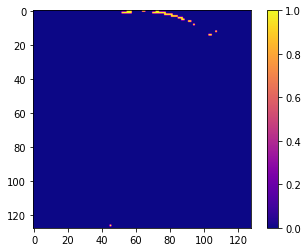

53


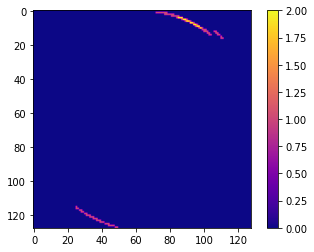

54


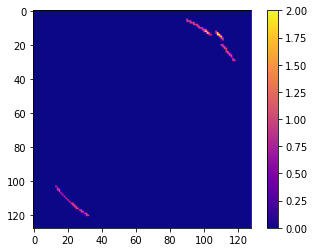

55


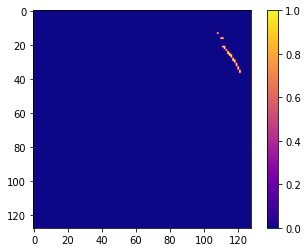

56


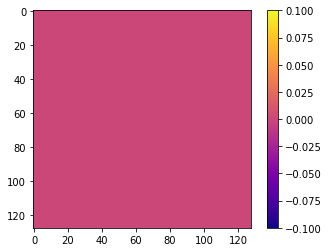

57


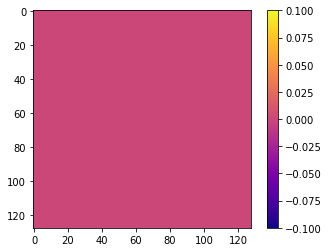

58


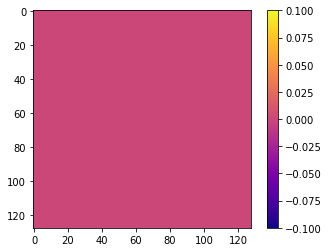

59


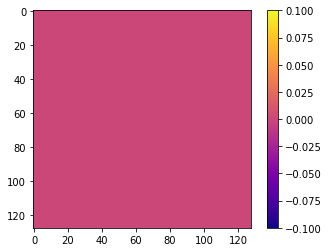

60


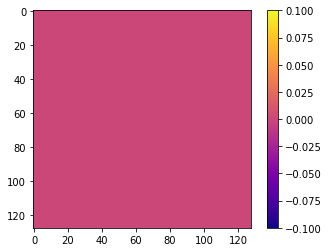

61


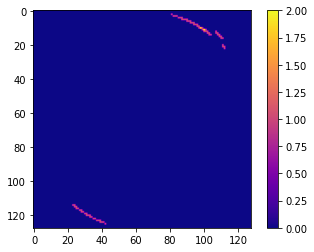

62


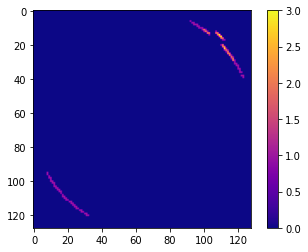

63


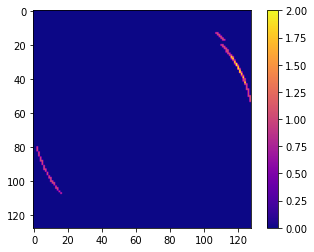

64


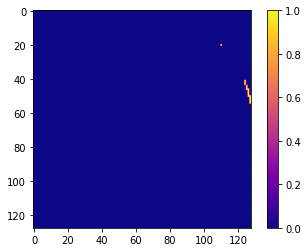

65


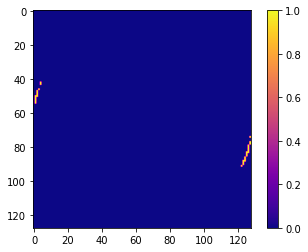

66


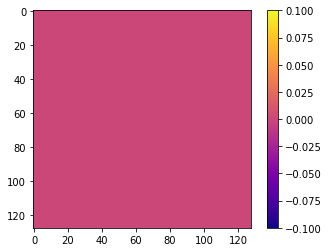

67


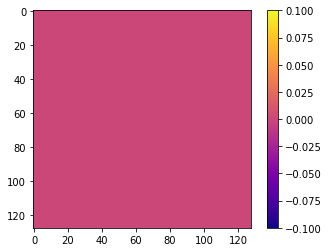

68


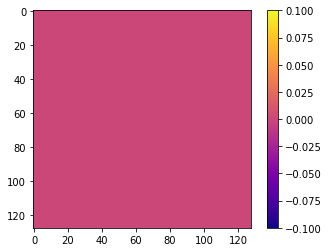

69


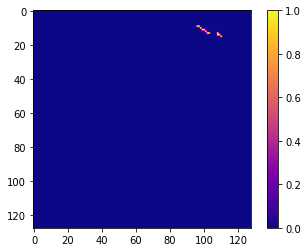

70


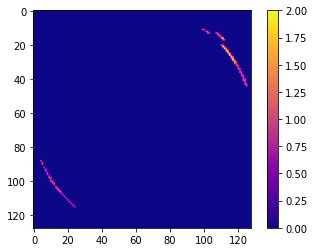

71


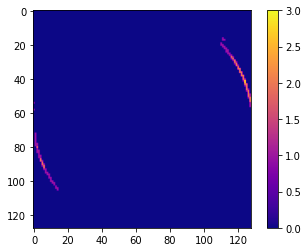

72


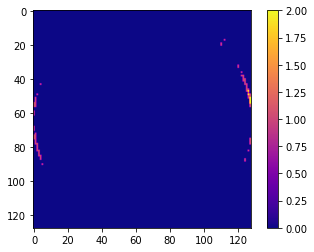

73


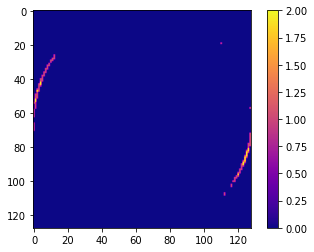

74


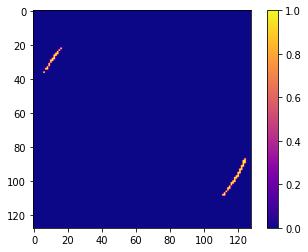

75


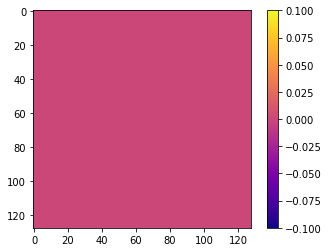

76


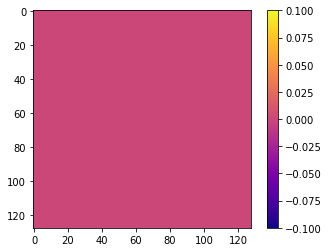

77


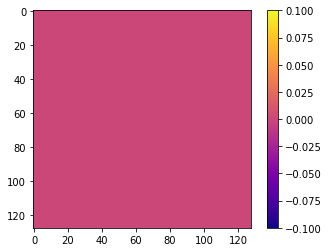

78


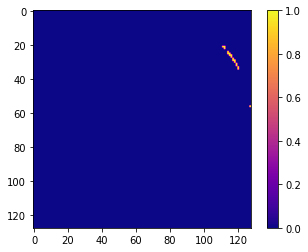

79


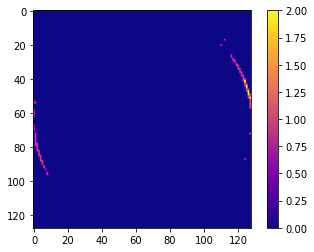

80


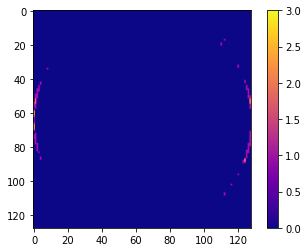

In [8]:
keyy = ["j","n","theta"]

total =len(soutput22)
for i in range(total):
  ssample = soutput22[i]['coef'][0,:,:]
  test=topilimage(ssample)
  print("[%d]"%(i),end=", ")
  for k in keyy:
    print(k,":", soutput22[i][k], end = ", ")
  plt.imshow(test,cmap='plasma')
  plt.colorbar()
  # plt.clim(0.00,0.00000000000001)
  plt.show()

### (2-3) 수정 J=3  - order 3까지

In [24]:
#Scattering2D() - 세팅
J=3
M,N = 512,512
s33= Scattering2D(J,(M,N),out_type = "list")

soutput33 = s33.scattering(timg) # scattering

RuntimeError: shape '[1, 524]' is invalid for input of size 275624

In [ ]:

keyy = ["j","n","theta"]

total =len(soutput22)
for i in range(total):
  ssample = soutput22[i]['coef'][0,:,:]
  test=topilimage(ssample)
  print("[%d]"%(i),end=", ")
  for k in keyy:
    print(k,":", soutput22[i][k], end = ", ")
  plt.imshow(test,cmap='plasma')
  plt.colorbar()
  # plt.clim(0.00,0.00000000000001)
  plt.show()

## 2-3. Filter 확인  
low pass filter와 wavelet filter 확인

### (0) 정의

Gobor filter정의

In [9]:
import numpy as np
from scipy.fft import fft2, ifft2

def gabor_2d(M, N, sigma, theta, xi, slant=1.0, offset=0):
    """
        Computes a 2D Gabor filter.
        A Gabor filter is defined by the following formula in space:
        psi(u) = g_{sigma}(u) e^(i xi^T u)
        where g_{sigma} is a Gaussian envelope and xi is a frequency.

        Parameters
        ----------
        M, N : int
            spatial sizes
        sigma : float
            bandwidth parameter
        xi : float
            central frequency (in [0, 1])
        theta : float
            angle in [0, pi]
        slant : float, optional
            parameter which guides the elipsoidal shape of the morlet
        offset : int, optional
            offset by which the signal starts

        Returns
        -------
        morlet_fft : ndarray
            numpy array of size (M, N)
    """
    gab = np.zeros((M, N), np.complex64)
    R = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]], np.float32)
    R_inv = np.array([[np.cos(theta), np.sin(theta)], [-np.sin(theta), np.cos(theta)]], np.float32)
    D = np.array([[1, 0], [0, slant * slant]])
    curv = np.dot(R, np.dot(D, R_inv)) / ( 2 * sigma * sigma)

    for ex in [-2, -1, 0, 1, 2]:
        for ey in [-2, -1, 0, 1, 2]:
            [xx, yy] = np.mgrid[offset + ex * M:offset + M + ex * M, offset + ey * N:offset + N + ey * N]
            arg = -(curv[0, 0] * np.multiply(xx, xx) + (curv[0, 1] + curv[1, 0]) * np.multiply(xx, yy) + curv[
                1, 1] * np.multiply(yy, yy)) + 1.j * (xx * xi * np.cos(theta) + yy * xi * np.sin(theta))
            gab += np.exp(arg)

    norm_factor = (2 * 3.1415 * sigma * sigma / slant)
    gab /= norm_factor

    return gab

Morlet filter 2d  
Morlet filter is the sum of Gabor filter and a low-pass filter to ensure that the sum has exactly zero mean in the temporal domain.

In [10]:
def morlet_2d(M, N, sigma, theta, xi, slant=0.5, offset=0):
    """
        Computes a 2D Morlet filter.
        A Morlet filter is the sum of a Gabor filter and a low-pass filter
        to ensure that the sum has exactly zero mean in the temporal domain.
        It is defined by the following formula in space:
        psi(u) = g_{sigma}(u) (e^(i xi^T u) - beta)
        where g_{sigma} is a Gaussian envelope, xi is a frequency and beta is
        the cancelling parameter.

        Parameters
        ----------
        M, N : int
            spatial sizes
        sigma : float
            bandwidth parameter
        xi : float
            central frequency (in [0, 1])
        theta : float
            angle in [0, pi]
        slant : float, optional
            parameter which guides the elipsoidal shape of the morlet
        offset : int, optional
            offset by which the signal starts

        Returns
        -------
        morlet_fft : ndarray
            numpy array of size (M, N)
    """
    wv = gabor_2d(M, N, sigma, theta, xi, slant, offset)
    wv_modulus = gabor_2d(M, N, sigma, theta, 0, slant, offset)
    K = np.sum(wv) / np.sum(wv_modulus)

    mor = wv - K * wv_modulus
    return mor

Periodize filter - returns a crop version of the filter assuming that the convolutions will be done via compactly supported signals

In [11]:

def periodize_filter_fft(x, res):
    """
        Parameters
        ----------
        x : numpy array
            signal to periodize in Fourier
        res :
            resolution to which the signal is cropped.

        Returns
        -------
        crop : numpy array
            It returns a crop version of the filter, assuming that
             the convolutions will be done via compactly supported signals.
    """
    M = x.shape[0]
    N = x.shape[1]

    crop = np.zeros((M // 2 ** res, N // 2 ** res), x.dtype)

    mask = np.ones(x.shape, np.float32)
    len_x = int(M * (1 - 2 ** (-res)))
    start_x = int(M * 2 ** (-res - 1))
    len_y = int(N * (1 - 2 ** (-res)))
    start_y = int(N * 2 ** (-res - 1))
    mask[start_x:start_x + len_x,:] = 0
    mask[:, start_y:start_y + len_y] = 0
    x = np.multiply(x,mask)

    for k in range(int(M / 2 ** res)):
        for l in range(int(N / 2 ** res)):
            for i in range(int(2 ** res)):
                for j in range(int(2 ** res)):
                    crop[k, l] += x[k + i * int(M / 2 ** res), l + j * int(N / 2 ** res)]

    return crop


### (1) loss pass filter [Phi] - gobor filter -> 0으로 세팅

In [8]:
J=2
phi_signal = gabor_2d(M, N, 0.8 * 2**(J-1), 0, 0)

NameError: name 'gabor_2d' is not defined

shape:  (512, 512)
type:  <class 'numpy.ndarray'>
한 값 예시:  (0.06217173+0j)
----real value만 ----
한 값 예시:  0.06217173
이미지로


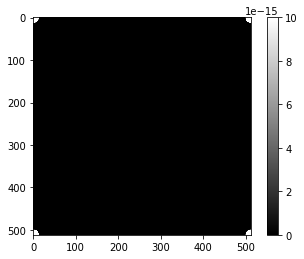

-----
예시 몇점 print
중간지점들 몇개: 0.0 0.0 0.0
첫번째 행: [6.2171731e-02 5.1141068e-02 2.8464291e-02 1.0719751e-02 2.7316352e-03
 4.7099296e-04 5.4949011e-05 4.3376954e-06 2.3169248e-07 8.3737222e-09
 2.0477592e-10 3.3883861e-12 3.7936796e-14 2.8739693e-16 1.4731851e-18
 5.1095924e-21 1.1991372e-23 1.9041677e-26 2.0459512e-29 1.4874387e-32
 7.3170592e-36 2.4354988e-39 5.4790770e-43 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0

In [81]:
# 기본정보 출력
print("shape: ", phi_signal.shape)
print("type: ", type(phi_signal))
print("한 값 예시: ", phi_signal[0][0])

print("----real value만 ----")
phi_signal_real = np.real(phi_signal)
print("한 값 예시: ", phi_signal_real[0][0])

print("이미지로")
plt.imshow(phi_signal_real,cmap='gray')
plt.colorbar()
plt.clim(0.00,0.00000000000001)
plt.show()

print("-----\n예시 몇점 print")
print('중간지점들 몇개:', phi_signal_real[200][256], phi_signal_real[200][200], phi_signal_real[100][256])
print("첫번째 행:", phi_signal_real[0])

[After fft2 and real]
shape: (512, 512)
한 값 예시: 1.0000294
이미지로


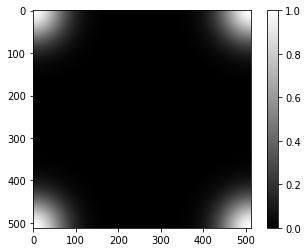

전에 이 결과를 4등분해서 꼭지점 부분을 붙여야 된다고 들은 것 같기도 하고 -> 그러면 average filter 이해됨


In [82]:
# 실제로 사용되듯이 fft하고
phi_signal_fourier = np.real(fft2(phi_signal))
print("[After fft2 and real]")
print('shape:', phi_signal_fourier.shape)
print('한 값 예시:', phi_signal_fourier[0][0])
print("이미지로")
plt.imshow(phi_signal_fourier,cmap='gray')
plt.colorbar()
# plt.clim(0.00,0.000000001)
plt.show()
print("전에 이 결과를 4등분해서 꼭지점 부분을 붙여야 된다고 들은 것 같기도 하고 -> 그러면 average filter 이해됨")

[0] (512, 512)


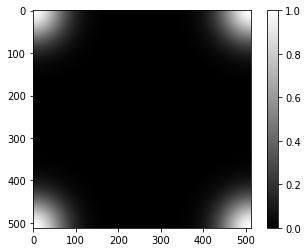

[1] (256, 256)


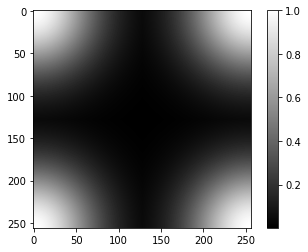

In [14]:
# 실제 코드
filters = {}
phi_signal = gabor_2d(M, N, 0.8 * 2**(J-1), 0, 0)
phi_signal_fourier = np.real(fft2(phi_signal))
# drop the imaginary part, it is zero anyway
filters['phi'] = {'levels': [], 'j': J}
for res in range(J):
    periodize_phi = periodize_filter_fft(phi_signal_fourier, res)
    filters['phi']['levels'].append(periodize_phi)
    print("[%d]"%(res), str(periodize_phi.shape))
    plt.imshow(periodize_phi,cmap='gray')
    plt.colorbar()
    plt.show()

### (2) wavelet filter [Psi] - gobor filter & morlet filter 

아래 wavelet filter를 만드는 과정이 오래 걸리는 것이였음! (J=2기준 50초 걸림)

#### (참고) J=3일 때

[j, theta]]: 0 0 ------------------------------
psi_signal_real


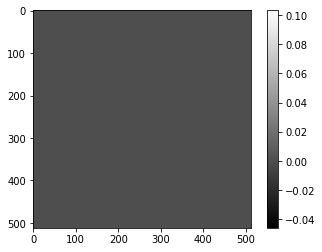

psi_signal_fourier


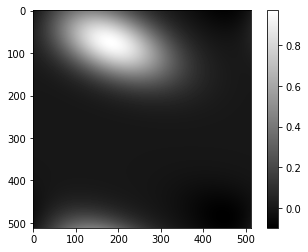

periodize_filter_fft, res =  0
(512, 512)


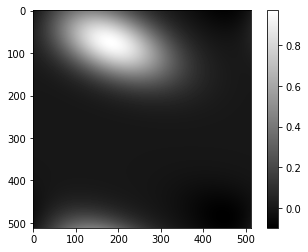

[j, theta]]: 0 1 ------------------------------
psi_signal_real


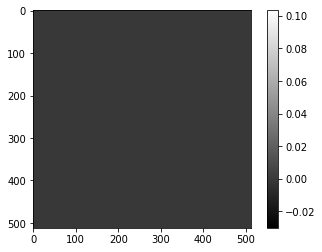

psi_signal_fourier


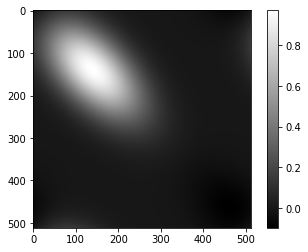

periodize_filter_fft, res =  0
(512, 512)


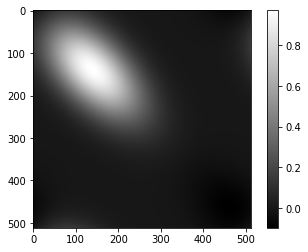

[j, theta]]: 0 2 ------------------------------
psi_signal_real


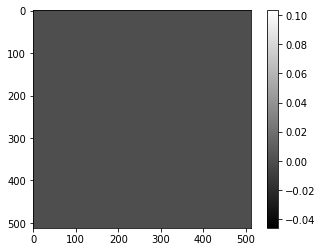

psi_signal_fourier


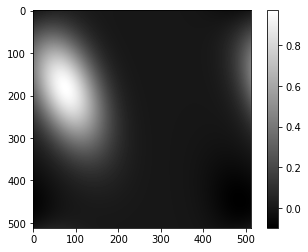

periodize_filter_fft, res =  0
(512, 512)


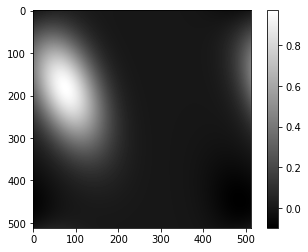

[j, theta]]: 0 3 ------------------------------
psi_signal_real


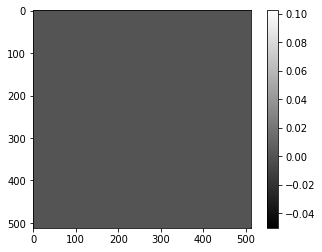

psi_signal_fourier


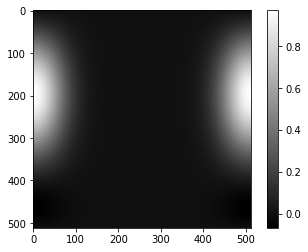

periodize_filter_fft, res =  0
(512, 512)


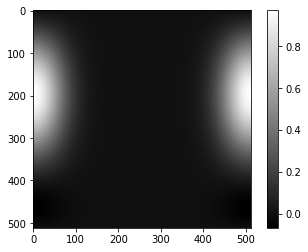

[j, theta]]: 0 4 ------------------------------
psi_signal_real


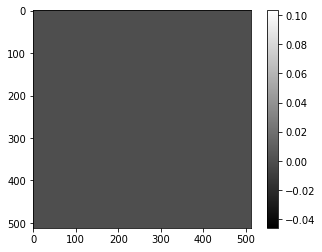

psi_signal_fourier


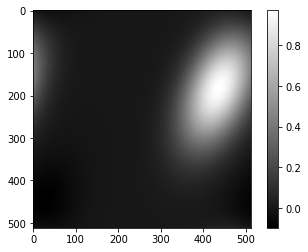

periodize_filter_fft, res =  0
(512, 512)


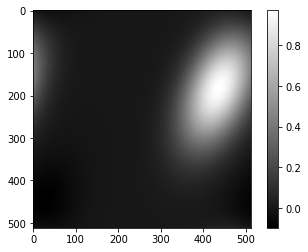

[j, theta]]: 0 5 ------------------------------
psi_signal_real


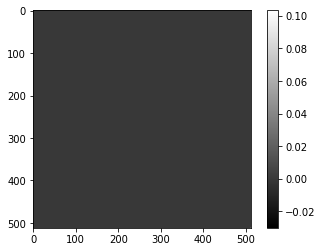

psi_signal_fourier


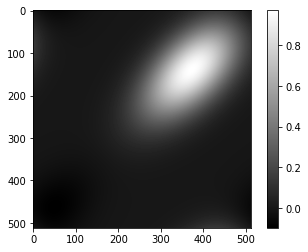

periodize_filter_fft, res =  0
(512, 512)


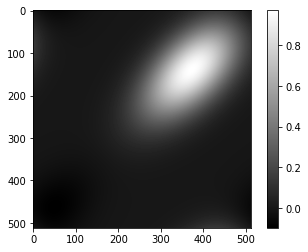

[j, theta]]: 0 6 ------------------------------
psi_signal_real


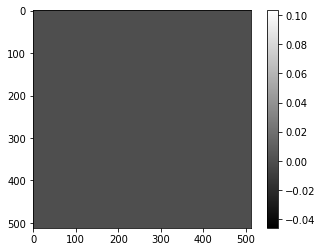

psi_signal_fourier


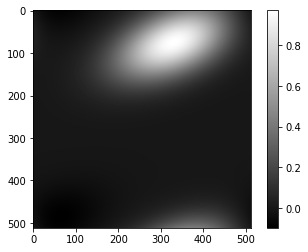

periodize_filter_fft, res =  0
(512, 512)


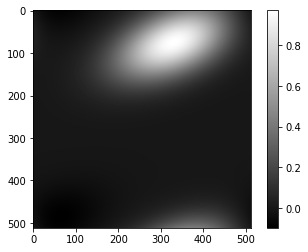

[j, theta]]: 0 7 ------------------------------
psi_signal_real


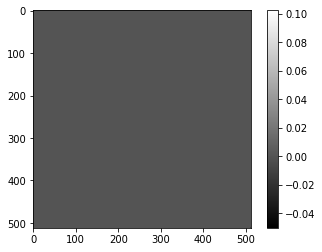

psi_signal_fourier


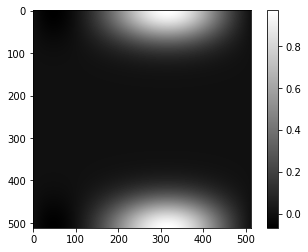

periodize_filter_fft, res =  0
(512, 512)


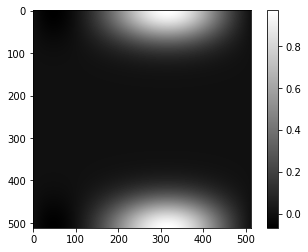

[j, theta]]: 1 0 ------------------------------
psi_signal_real


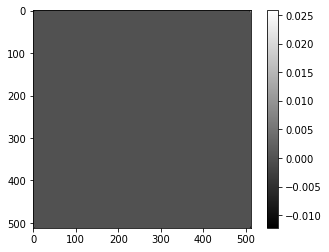

psi_signal_fourier


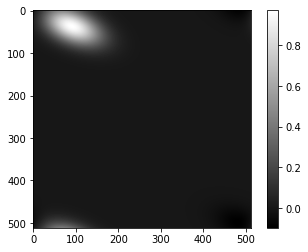

periodize_filter_fft, res =  0
(512, 512)


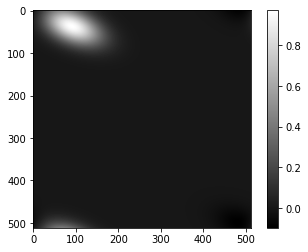

periodize_filter_fft, res =  1
(256, 256)


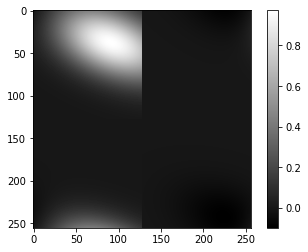

[j, theta]]: 1 1 ------------------------------
psi_signal_real


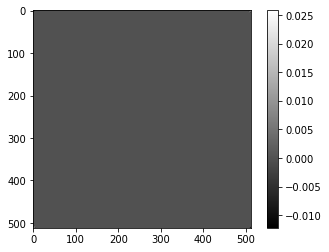

psi_signal_fourier


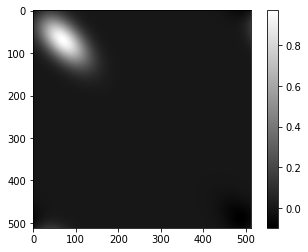

periodize_filter_fft, res =  0
(512, 512)


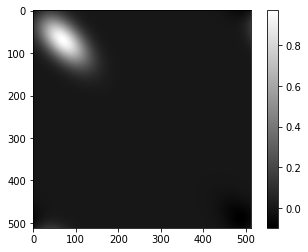

periodize_filter_fft, res =  1
(256, 256)


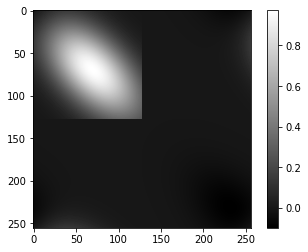

[j, theta]]: 1 2 ------------------------------
psi_signal_real


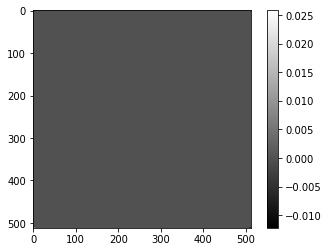

psi_signal_fourier


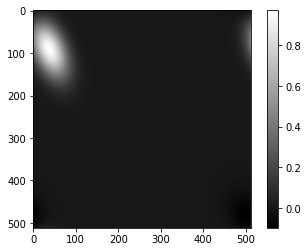

periodize_filter_fft, res =  0
(512, 512)


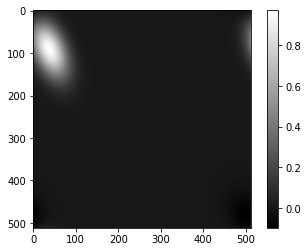

periodize_filter_fft, res =  1
(256, 256)


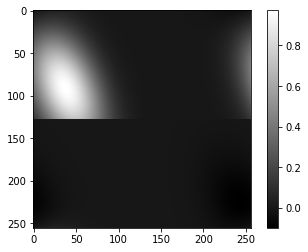

[j, theta]]: 1 3 ------------------------------
psi_signal_real


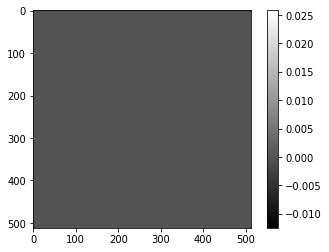

psi_signal_fourier


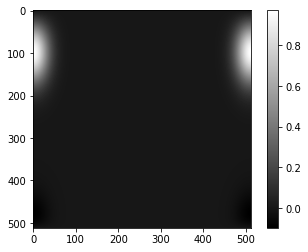

periodize_filter_fft, res =  0
(512, 512)


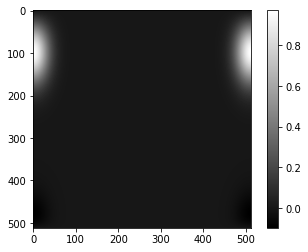

periodize_filter_fft, res =  1
(256, 256)


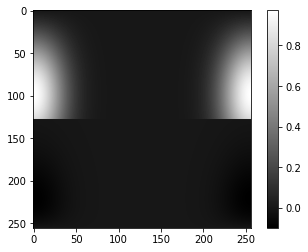

[j, theta]]: 1 4 ------------------------------
psi_signal_real


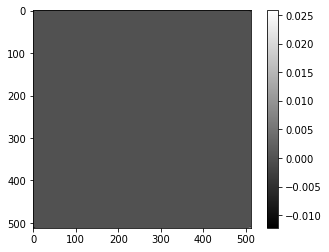

psi_signal_fourier


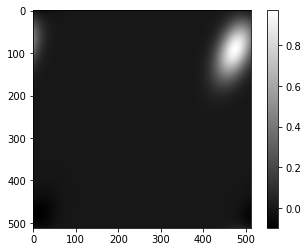

periodize_filter_fft, res =  0
(512, 512)


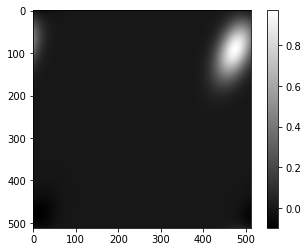

periodize_filter_fft, res =  1
(256, 256)


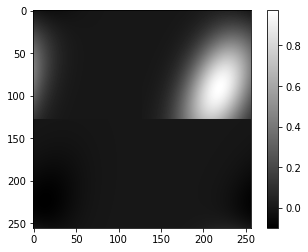

[j, theta]]: 1 5 ------------------------------
psi_signal_real


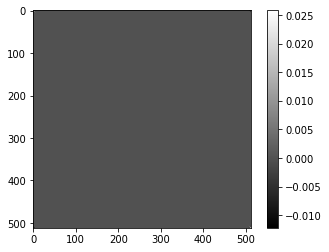

psi_signal_fourier


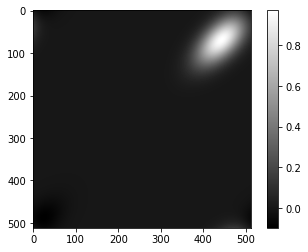

periodize_filter_fft, res =  0
(512, 512)


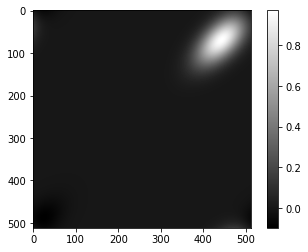

periodize_filter_fft, res =  1
(256, 256)


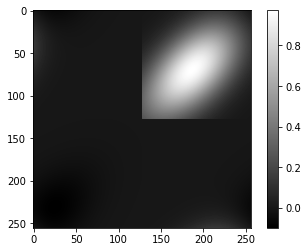

[j, theta]]: 1 6 ------------------------------
psi_signal_real


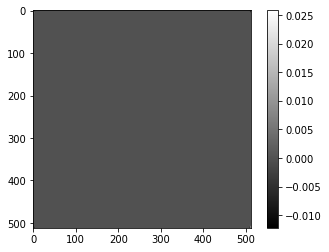

psi_signal_fourier


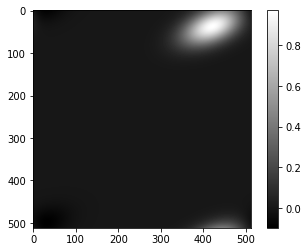

periodize_filter_fft, res =  0
(512, 512)


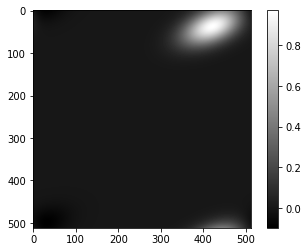

periodize_filter_fft, res =  1
(256, 256)


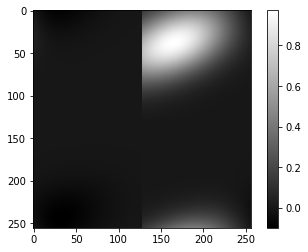

[j, theta]]: 1 7 ------------------------------
psi_signal_real


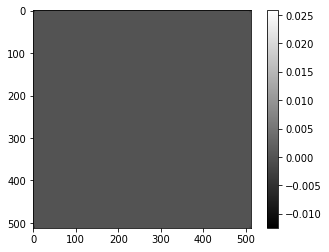

psi_signal_fourier


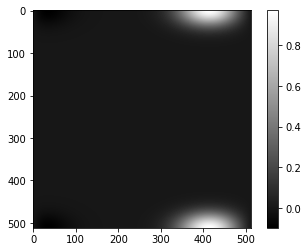

periodize_filter_fft, res =  0
(512, 512)


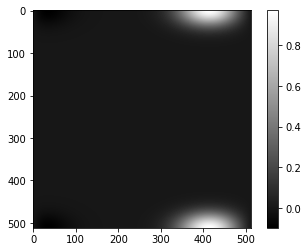

periodize_filter_fft, res =  1
(256, 256)


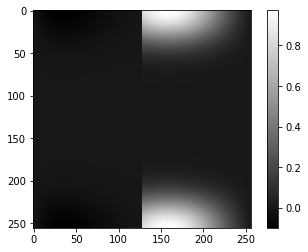

[j, theta]]: 2 0 ------------------------------
psi_signal_real


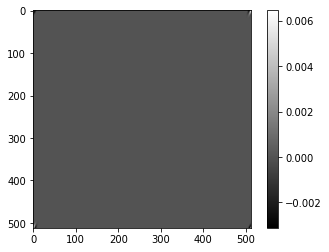

psi_signal_fourier


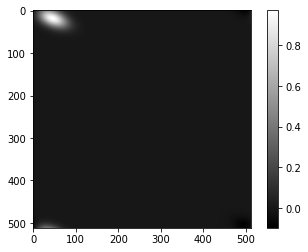

periodize_filter_fft, res =  0
(512, 512)


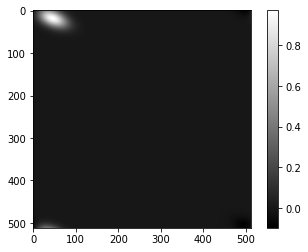

periodize_filter_fft, res =  1
(256, 256)


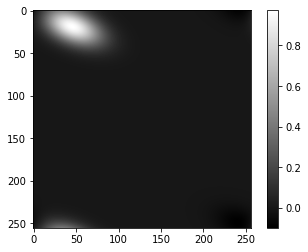

[j, theta]]: 2 1 ------------------------------
psi_signal_real


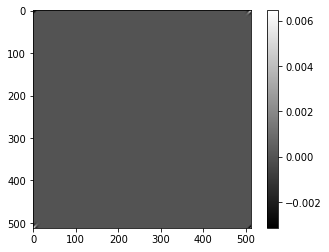

psi_signal_fourier


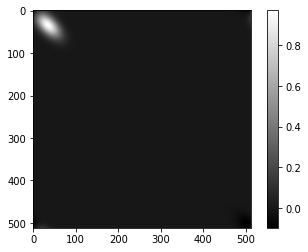

periodize_filter_fft, res =  0
(512, 512)


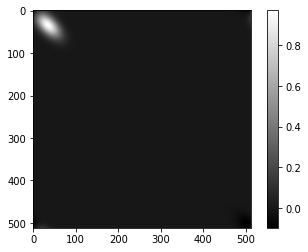

periodize_filter_fft, res =  1
(256, 256)


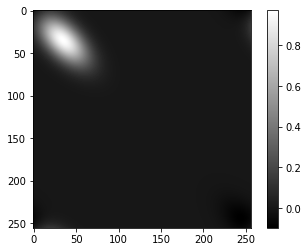

[j, theta]]: 2 2 ------------------------------
psi_signal_real


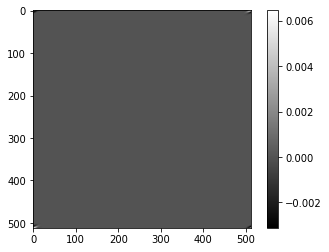

psi_signal_fourier


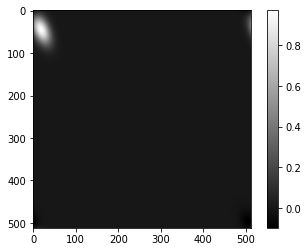

periodize_filter_fft, res =  0
(512, 512)


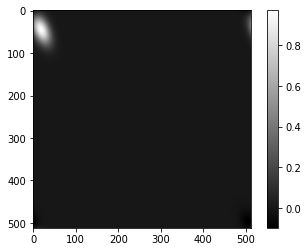

periodize_filter_fft, res =  1
(256, 256)


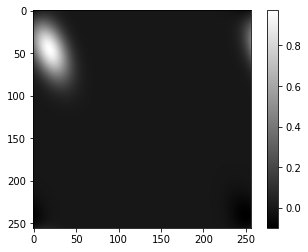

[j, theta]]: 2 3 ------------------------------
psi_signal_real


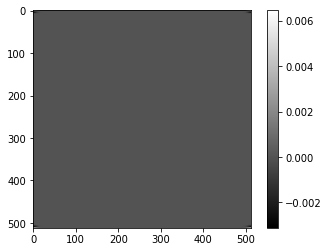

psi_signal_fourier


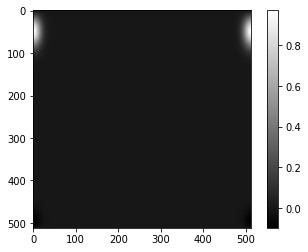

periodize_filter_fft, res =  0
(512, 512)


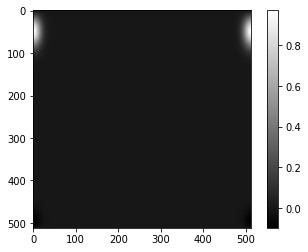

periodize_filter_fft, res =  1
(256, 256)


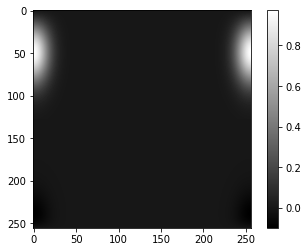

[j, theta]]: 2 4 ------------------------------
psi_signal_real


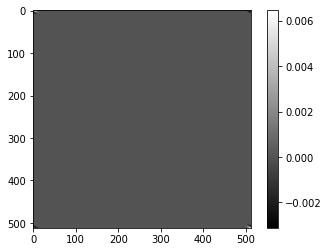

psi_signal_fourier


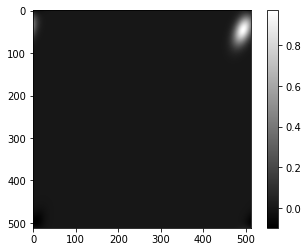

periodize_filter_fft, res =  0
(512, 512)


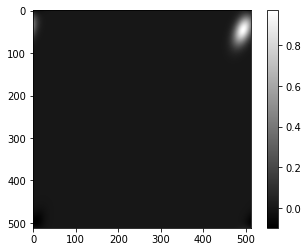

periodize_filter_fft, res =  1
(256, 256)


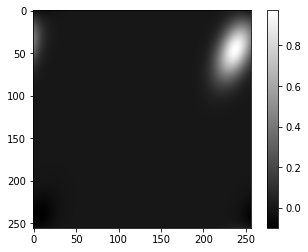

[j, theta]]: 2 5 ------------------------------
psi_signal_real


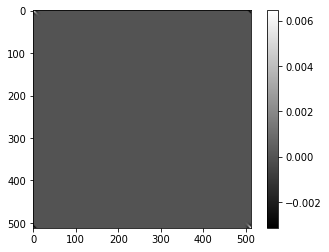

psi_signal_fourier


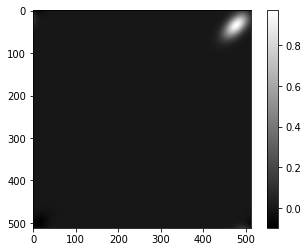

periodize_filter_fft, res =  0
(512, 512)


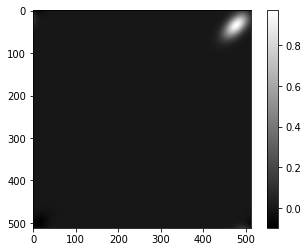

periodize_filter_fft, res =  1
(256, 256)


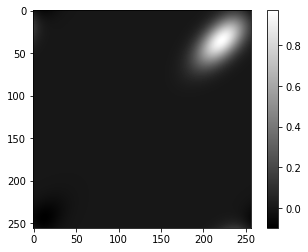

[j, theta]]: 2 6 ------------------------------
psi_signal_real


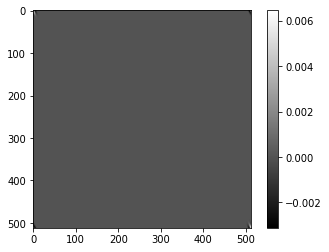

psi_signal_fourier


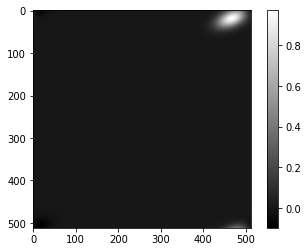

periodize_filter_fft, res =  0
(512, 512)


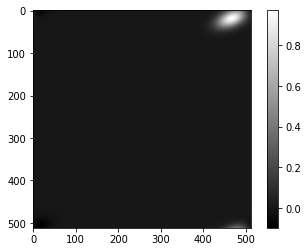

periodize_filter_fft, res =  1
(256, 256)


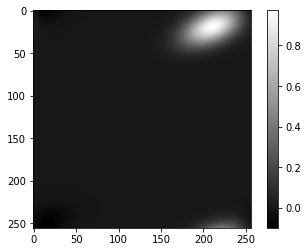

[j, theta]]: 2 7 ------------------------------
psi_signal_real


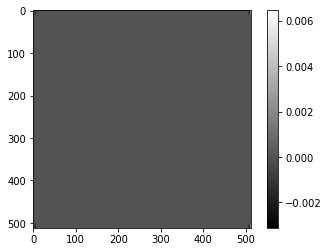

psi_signal_fourier


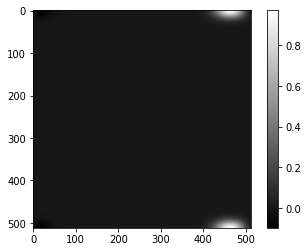

periodize_filter_fft, res =  0
(512, 512)


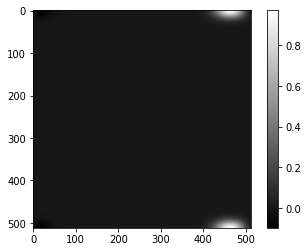

periodize_filter_fft, res =  1
(256, 256)


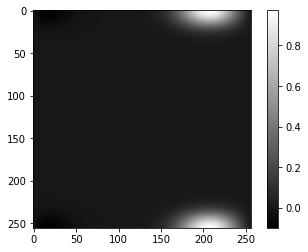

In [78]:
filters = {}
filters['psi'] = []
L=8
J=3
for j in range(J):
    for theta in range(L):
        print("[j, theta]]:", j, theta, "------------------------------")
        psi = {'levels': [], 'j': j, 'theta': theta}
        psi_signal = morlet_2d(M, N, 0.8 * 2**j,
            (int(L-L/2-1)-theta) * np.pi / L,
            3.0 / 4.0 * np.pi /2**j, 4.0/L)
        print("psi_signal_real")
        psi_signal_real = np.real(psi_signal)
        plt.imshow(psi_signal_real,cmap='gray')
        plt.colorbar()
        plt.show()
        
        print("psi_signal_fourier")
        psi_signal_fourier = np.real(fft2(psi_signal))
        plt.imshow(psi_signal_fourier,cmap='gray')
        plt.colorbar()
        plt.show()
        # drop the imaginary part, it is zero anyway
        psi_levels = []
        for res in range(min(j + 1, max(J - 1, 1))): # range(1)
            print("periodize_filter_fft, res = ", res)
            periodize_filter_fft_result = periodize_filter_fft(psi_signal_fourier, res)
            psi_levels.append(periodize_filter_fft_result)
            print(periodize_filter_fft_result.shape)
            plt.imshow(periodize_filter_fft_result,cmap='gray')
            plt.colorbar()
            plt.show()
        psi['levels'] = psi_levels
        filters['psi'].append(psi)

In [64]:
# 예시
filters["psi"][20]["levels"]

[array([[ 2.93366611e-08, -4.71351808e-03, -9.21917055e-03, ...,
          1.46437325e-02,  9.75661166e-03,  4.84900502e-03],
        [ 1.19648241e-02,  6.87918440e-03,  1.96691509e-03, ...,
          2.74700616e-02,  2.23426819e-02,  1.71464719e-02],
        [ 2.46941335e-02,  1.91830993e-02,  1.38101382e-02, ...,
          4.12095487e-02,  3.57949100e-02,  3.02603208e-02],
        ...,
        [-3.10775321e-02, -3.49645764e-02, -3.85491252e-02, ...,
         -1.82395689e-02, -2.26468518e-02, -2.69494485e-02],
        [-2.15373524e-02, -2.56548785e-02, -2.94995606e-02, ...,
         -8.21549632e-03, -1.27467792e-02, -1.72115229e-02],
        [-1.11738779e-02, -1.55657735e-02, -1.97164789e-02, ...,
          2.74589658e-03, -1.94391771e-03, -6.60899375e-03]], dtype=float32),
 array([[ 2.93366611e-08, -4.71351808e-03, -9.21917055e-03, ...,
          1.46437325e-02,  9.75661166e-03,  4.84900502e-03],
        [ 1.19648241e-02,  6.87918440e-03,  1.96691509e-03, ...,
          2.74700616e-0

#### J=2 일 때 filter 확인

In [15]:
filters = {}
filters['psi'] = []
L=8
J=2
for j in range(J):
    for theta in range(L):
        print("[j, theta]]:", j, theta, "------------------------------")
        psi = {'levels': [], 'j': j, 'theta': theta}
        psi_signal = morlet_2d(M, N, 0.8 * 2**j,
            (int(L-L/2-1)-theta) * np.pi / L,
            3.0 / 4.0 * np.pi /2**j, 4.0/L)
        print("psi_signal_real")
        psi_signal_real = np.real(psi_signal)
        # plt.imshow(psi_signal_real,cmap='gray')
        # plt.colorbar()
        # plt.show()
        
        print("psi_signal_fourier")
        psi_signal_fourier = np.real(fft2(psi_signal))
        # plt.imshow(psi_signal_fourier,cmap='gray')
        # plt.colorbar()
        # plt.show()
        # drop the imaginary part, it is zero anyway
        psi_levels = []
        for res in range(min(j + 1, max(J - 1, 1))): # range(1)
            print("periodize_filter_fft, res = ", res)
            periodize_filter_fft_result = periodize_filter_fft(psi_signal_fourier, res)
            psi_levels.append(periodize_filter_fft_result)
            print(periodize_filter_fft_result.shape)
            # plt.imshow(periodize_filter_fft_result,cmap='gray')
            # plt.colorbar()
            # plt.show()
        psi['levels'] = psi_levels
        filters['psi'].append(psi)

[j, theta]]: 0 0 ------------------------------
psi_signal_real
psi_signal_fourier
periodize_filter_fft, res =  0
(512, 512)
[j, theta]]: 0 1 ------------------------------
psi_signal_real
psi_signal_fourier
periodize_filter_fft, res =  0
(512, 512)
[j, theta]]: 0 2 ------------------------------
psi_signal_real
psi_signal_fourier
periodize_filter_fft, res =  0
(512, 512)
[j, theta]]: 0 3 ------------------------------
psi_signal_real
psi_signal_fourier
periodize_filter_fft, res =  0
(512, 512)
[j, theta]]: 0 4 ------------------------------
psi_signal_real
psi_signal_fourier
periodize_filter_fft, res =  0
(512, 512)
[j, theta]]: 0 5 ------------------------------
psi_signal_real
psi_signal_fourier
periodize_filter_fft, res =  0
(512, 512)
[j, theta]]: 0 6 ------------------------------
psi_signal_real
psi_signal_fourier
periodize_filter_fft, res =  0
(512, 512)
[j, theta]]: 0 7 ------------------------------
psi_signal_real
psi_signal_fourier
periodize_filter_fft, res =  0
(512, 512)


In [14]:
total = len(filters['psi'])
for i in range(total):
        f= filters['psi'][i]['levels']
        print(len(f))
        # print("[%d]:"%(i), str(f[0].shape))

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
